In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hespress/stories_faits-divers.csv
/kaggle/input/hespress/comments_marocains-du-monde.csv
/kaggle/input/hespress/stories_art-et-culture.csv
/kaggle/input/hespress/comments_regions.csv
/kaggle/input/hespress/comments_orbites.csv
/kaggle/input/hespress/stories_regions.csv
/kaggle/input/hespress/comments_art-et-culture.csv
/kaggle/input/hespress/stories_sport.csv
/kaggle/input/hespress/stories_medias.csv
/kaggle/input/hespress/comments_economie.csv
/kaggle/input/hespress/comments_medias.csv
/kaggle/input/hespress/stories_economie.csv
/kaggle/input/hespress/comments_sport.csv
/kaggle/input/hespress/comments_politique.csv
/kaggle/input/hespress/stories_tamazight.csv
/kaggle/input/hespress/stories_societe.csv
/kaggle/input/hespress/stories_orbites.csv
/kaggle/input/hespress/comments_societe.csv
/kaggle/input/hespress/stories_politique.csv
/kaggle/input/hespress/stories_marocains-du-monde.csv
/kaggle/input/hespress/comments_faits-divers.csv
/kaggle/input/hespress/comments_tamazig

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.isri import ISRIStemmer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import itertools
import random
import os
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
import sklearn
from collections import Counter

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
folder_path = '/kaggle/input/hespress'  

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

data_frames = {}

for csv_file in csv_files:
    csv_file_path = os.path.join(folder_path, csv_file)
    print(f"Contents of {csv_file}:")
    df = pd.read_csv(csv_file_path)
    df = df.iloc[:, 2:] 
    display(df)
    print("\n")

Contents of stories_faits-divers.csv:


,title,date,author,story,topic
0,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",الجمعة 02 أكتوبر 2020 - 20:08,هسبريس من الدار البيضاء,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers
1,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",الجمعة 02 أكتوبر 2020 - 19:37,رشيد بيجيكن من أكادير,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers
2,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,الجمعة 02 أكتوبر 2020 - 18:35,ابراهيم مغراوي من مراكش,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers
3,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",الجمعة 02 أكتوبر 2020 - 14:20,هسبريس من زاكورة,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,faits-divers
4,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",الجمعة 02 أكتوبر 2020 - 10:05,رشيد بيجيكن من أكادير,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers
...,...,...,...,...,...
995,مصرع عامل داخل مؤسسة تعليمية قرب شفشاون‎,الخميس 04 يونيو 2020 - 14:05,هسبريس من تطوان,لفظ عامل بناء أنفاسه الأخيرة على الفور، أمس ال...,faits-divers
996,الشرطة تباغت مروجا للمخدرات وسط مدينة تطوان‎,الخميس 04 يونيو 2020 - 12:15,هسبريس من تطوان,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers
997,تفكيك شبكة مختصة في الإجهاض بمدينة مراكش,الخميس 04 يونيو 2020 - 08:35,إبراهيم مغراوي من مراكش,أحالت عناصر الشرطة القضائية بولاية أمن مراكش، ...,faits-divers
998,"""كوفيد-19"" ينهي حياة ممرض متقاعد في كلميم",الخميس 04 يونيو 2020 - 07:10,مصطفى البكار,أعلنت المديرية الجهوية لوزارة الصحة بجهة كلميم...,faits-divers




Contents of comments_marocains-du-monde.csv:


,comment,score,topic
0,سيذكر التاريخ أن سياح أجانب دخلوا المغرب و موا...,428,marocains-du-monde
1,الحكومات لي كتحتارم شعوبها،رجعت مواطنين الحاصل...,303,marocains-du-monde
2,وايلي حتى فات الفوت عاد سولني كيف ابقيت ويلي و...,154,marocains-du-monde
3,الله اعلم لماذا كل هذا التأخر!!! شكرا على ستة ...,107,marocains-du-monde
4,لقد تأخرت السلطات المغربية كثيرا لإعادة هؤلاء ...,169,marocains-du-monde
...,...,...,...
27548,انسان صادق وطني نمودج يقتدى به. ا قترحه سفيرا ...,27,marocains-du-monde
27549,"Jawad is an example of hard work, discipline a...",12,marocains-du-monde
27550,يقول المثل. من اين ذلك.ااشبل من ذاك الاسد انا ...,11,marocains-du-monde
27551,د. جواد الخراز ممن يجمعون بين تواضع الكبار وشم...,13,marocains-du-monde




Contents of stories_art-et-culture.csv:


,title,date,author,story,topic
0,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture
...,...,...,...,...,...
995,مِهَنيّون: غياب توقيع رئيس الحكومة يوقف 200 مش...,الاثنين 18 نونبر 2019 - 00:25,هسبريس - وائل بورشاشن,تستمرّ الآثار الجانبية للانتقال الحكومي الأخير...,art-et-culture
996,"ندوة تقارب ""جهود السوسيين"" في خدمة العربية",الأحد 17 نونبر 2019 - 11:15,الحسين حرّان,"قال الدكتور المهدي السعيدي، في ندوة حول ""جهود ...",art-et-culture
997,تتويج أشرطة في مهرجان سينما الذاكرة المشتركة,السبت 16 نونبر 2019 - 20:17,هسبريس من الرباط,أجمعت لجنة المسابقة الخاصة بالأفلام المغربية ا...,art-et-culture
998,ريشة التشكيلية بثينة أزمي تتمرد على الظلم والع...,السبت 16 نونبر 2019 - 10:00,هسبريس - كاميليا كريم,ألوان حيّة ولمسات تعبيرية تحْمل مآسي إنسانية ل...,art-et-culture




Contents of comments_regions.csv:


,comment,score,topic
0,وقاليك التعليم الحضوري والله ما بقيت فاهما حاج...,27,regions
1,Les barrières en béton que les autorités utili...,11,regions
2,السلام عليكم الدار البيضاء مدينة غولة يا رب تل...,3,regions
3,والخريف هذا المناعة تقل وتقلبات الطقس وجب أخذ ...,7,regions
4,علميا وكما حدد مجموعة من الباحثين الفرنسيين ال...,-9,regions
...,...,...,...
9764,تنغير تنخرها العقلية القلبية ورداءة النخبة الس...,1,regions
9765,C'est un grand village où la chaleur est très ...,1,regions
9766,جل بلدات (حتى نسمي الاشياء بمسمياتها إذ لا وجو...,1,regions
9767,يجب فك العزلة و القطع مع التهميش في مغربنا الش...,0,regions




Contents of comments_orbites.csv:


,comment,score,topic
0,من تفضل النظام الجزائري ام النظام الاسرائيلي ط...,64,orbites
1,نحن بإيماننا لا نعترف من لا يؤمن بان شعار بلدن...,92,orbites
2,نحن بإيماننا لا نعترف من لا يؤمن بان شعار بلدن...,27,orbites
3,غير الحسد و الغيرة هما عارفين ماعندهمش دبلوماس...,84,orbites
4,على الجزائر أو على الشعب الجزاءري أن يعلم قبل ...,112,orbites
...,...,...,...
32544,أين كنتم طيلة هذه العقود ؟ \nأوصلتم المغرب إلي...,0,orbites
32545,في المغرب 34 مليون نسمة وعندنا 71 الف شرطي فقط...,11,orbites
32546,كل هذا الاهتمام من طرف الشعب ليس لان الشرطة مم...,6,orbites
32547,ان المدرسة البصرية لازالت مؤثرة في بعض الاشخاص...,0,orbites




Contents of stories_regions.csv:


,title,date,author,story,topic
0,جهة الدار البيضاء تحصي 1247 إصابة بالجائحة في ...,الجمعة 02 أكتوبر 2020 - 19:03,هسبريس من الرباط,بلغ مؤشر الإصابة بفيروس كورونا في آخر 24 ساعة ...,regions
1,"إقليم سيدي إفني يسجل أول وفاة بسبب ""كورونا""",الجمعة 02 أكتوبر 2020 - 18:15,مصطفى البكار من تزنيت,سجل إقليم سيدي إفني، اليوم الجمعة، أول وفاة نا...,regions
2,قبور إسمنتية معدة للدفن تثير رفضا بمدينة صفرو,الجمعة 02 أكتوبر 2020 - 16:10,رشيد الكويرتي من فاس,طالب ممثلو فرق المعارضة بمجلس جماعة صفرو، المن...,regions
3,الفيروس يقتل نائب رئيس بلدية الفقيه بن صالح,الجمعة 02 أكتوبر 2020 - 15:05,حميد رزقي من الفقيه بن صالح,توفي النائب الأول لرئيس بلدية الفقيه بنصالح، ب...,regions
4,"""شباب ملعب"" يطلق مبادرات اجتماعية وتنموية",الجمعة 02 أكتوبر 2020 - 10:27,محمد ايت حساين,نجح سكان مركز جماعة ملعب، الواقعة بالنفوذ الإد...,regions
...,...,...,...,...,...
995,تفاصيل الحالة الوبائية بجهة درعة - تافيلالت,السبت 08 غشت 2020 - 05:21,محمد ايت حساين من ورزازات,كشفت المديرية الجهوية لوزارة الصحة بجهة درعة ت...,regions
996,توقعات أحوال الطقس اليوم السبت في المغرب,السبت 08 غشت 2020 - 04:29,هسبريس من الرباط,تتوقع المديرية العامة للأرصاد الجوية، اليوم ال...,regions
997,أسطول النقل المدرسي في وزان يتعزز بـ14 سيارة ‬,السبت 08 غشت 2020 - 03:33,هسبريس من وزان,في إطار دعم وتشجيع التمدرس بالجماعات الترابية ...,regions
998,لجنة اليقظة تغلق الحدائق والمنتزهات بمراكش,السبت 08 غشت 2020 - 01:05,إبراهيم مغراوي من مراكش,أدى الارتفاع المهول في الحالات النشطة على مستو...,regions




Contents of comments_art-et-culture.csv:


,comment,score,topic
0,علينا الاهتمام ببيت الابحاث العلمية و المختبرا...,-9,art-et-culture
1,بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أ...,5,art-et-culture
2,مبادرات مهمة يقوم بها بيت الشعر لصون الذاكرة ا...,4,art-et-culture
3,شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاع...,5,art-et-culture
4,كل من عليها فان ويبقى وجه ربك ذو الجلال والإكر...,13,art-et-culture
...,...,...,...
10563,نريد معرضا تشكيليا للرجل ايضا يخص الظلم و الحي...,5,art-et-culture
10564,هل يسمح لنا المنبر برسم كلمة اتمنى ان تكون قصي...,6,art-et-culture
10565,في حين ان الرجل تجاوزقرون مضت المنظور الانتمائ...,7,art-et-culture
10566,من كان يخرج للصيد حيوانات مفترسة في العهد القد...,7,art-et-culture




Contents of stories_sport.csv:


,title,date,author,story,topic
0,3 أندية تشعل المنافسة على درع البطولة الوطنية,السبت 03 أكتوبر 2020 - 07:50,هسبورت - آمال لكعيدا,رغم أن المستوى التقني العام لمباريات الدوري، م...,sport
1,لامبارد يؤكد غياب زياش مجددا عن نادي تشيلسي,السبت 03 أكتوبر 2020 - 02:30,هسبورت - حمزة اشتيوي,أكد فرانك لامبارد، مدرب نادي تشيلسي الإنجليزي ...,sport
2,"إعفاء البرتغالي ""أروزو"" من تدريب منتخب الشبان",الجمعة 02 أكتوبر 2020 - 20:20,هسبريس من الرباط,وافقت الإدارة التقنية التابعة للجامعة الملكية ...,sport
3,"""فيفا"" يجري تعديلات على قواعد استدعاء اللاعبين",الجمعة 02 أكتوبر 2020 - 17:47,هسبريس - د.ب.أ,أعلن الاتحاد الدولي لكرة القدم (فيفا) في وقت م...,sport
4,الجامعة الملكية للكراطي تقرر دعم جمعيات رياضية,الجمعة 02 أكتوبر 2020 - 01:41,ياسين أوشن,"قررت ""الجامعة الملكية المغربية للكراطي وأساليب...",sport
...,...,...,...,...,...
995,ميلان الإيطالي يهتم بخدمات المغربي عمران لوزا,الثلاثاء 03 مارس 2020 - 02:40,أوعنا بلعيد,‪ يراهن مسؤولو أيس ميلان الإيطالي لكرة القدم ع...,sport
996,ثلاثية تمنح التفوق ليوسفية برشيد أمام طنجة,الاثنين 02 مارس 2020 - 21:19,هسبريس من الرباط,تمكن فريق يوسفية برشيد من الفوز بميدانه على ات...,sport
997,"النصيري يحصد ثمار تألقه أمام أوساسونا بـ""لاليغا""",الاثنين 02 مارس 2020 - 20:35,أوعنا بلعيد,دخل النجم المغربي الشاب يوسف النصيري بسرعة وجي...,sport
998,"حجي يستقيل من منصب الكاتب العام لـ""الكاف""",الاثنين 02 مارس 2020 - 18:01,هسبريس - و.م .ع,قدم الكاتب العام للكونفدرالية الإفريقية لكرة ا...,sport




Contents of stories_medias.csv:


,title,date,author,story,topic
0,"رصيف الصحافة: نبتة ""الداد"" تقتل طفلين وتصيب 6 ...",الجمعة 02 أكتوبر 2020 - 22:00,هسبريس من الرباط,قراءة مواد بعض الجرائد الخاصة بنهاية الأسبوع ن...,medias
1,رصيف الصحافة: حموشي يطلق فرقا أمنية جديدة للتد...,الخميس 01 أكتوبر 2020 - 22:00,هسبريس من الرباط,"قراءة رصيف صحافة الجمعة نستهلها من ""المساء""، ا...",medias
2,رصيف الصحافة: الحُكم بإعدام أب وزوجته لذبح الا...,الأربعاء 30 شتنبر 2020 - 22:00,هسبريس من الرباط,مطالعة أنباء بعض الجرائد الصادرة يوم الخميس نس...,medias
3,"رصيف الصحافة: مختبرات خاصة ترفع ""تعريفة"" الكشف...",الثلاثاء 29 شتنبر 2020 - 22:00,هسبريس من الرباط,"قراءة رصيف صحافة يوم الأربعاء نستهلها من ""المس...",medias
4,رصيف الصحافة: عيوب تشوب مشروعا ملكيا بميزانية ...,الاثنين 28 شتنبر 2020 - 22:00,هسبريس من الرباط,قراءة مواد بعض الجرائد الخاصة بيوم الثلاثاء من...,medias
...,...,...,...,...,...
995,رصيف الصحافة: عقوبات تنتظر أمنيّين بعد اختراق ...,الأحد 31 مارس 2019 - 22:00,هسبريس ـ فاطمة الزهراء صدور,مستهل قراءة رصيف صحافة بداية الأسبوع من اعتراض...,medias
996,"رصيف الصحافة: ""صفحات ساخنة"" تدوّن أسرار رجال ا...",السبت 30 مارس 2019 - 21:00,هسبريس ـ فاطمة الزهراء صدور,"قراءة مواد بعض الأسبوعيات من ""الأيام"" التي اهت...",medias
997,رصيف الصحافة: أضخم صفقة عسكرية مغربية تُقلق ال...,الجمعة 29 مارس 2019 - 21:03,هسبريس - فاطمة الزهراء صدور,نستهل جولة رصيف صحافة نهاية الأسبوع من استنفار...,medias
998,"رصيف الصحافة: مقاتلون مغاربة ينقلبون على ""خليف...",الخميس 28 مارس 2019 - 21:00,هسبريس ـ فاطمة الزهراء صدور,"مستهل قراءة رصيف الصحافة من ""أخبار اليوم""، الت...",medias




Contents of comments_economie.csv:


,comment,score,topic
0,هذه السنة الكل يحمل المسؤولية لكورونا،ولله الح...,12,economie
1,القوانيين التشريعية تعيقها التماسيح و اغلبية ا...,7,economie
2,قانون الشغل مثقوب من قبل من كورونا ، المشغلين ...,8,economie
3,فراغات هي ف بزاف د الميادين كاينة قبل من كورون...,9,economie
4,ياودي راه الفراغ كاين من شحال هادي ݣاع ماديروا...,8,economie
...,...,...,...
28071,الكل من عند الشعب الفقير رغم أن الموارد و على ...,-14,economie
28072,نتمنى ان يتبرع الاطار الوطني بادو الزاكي خاصة ...,6,economie
28073,يجب اعادة النظر في راتب مدرب المنتخب الواطني,18,economie
28074,je trouve que la caisse corona la depasse tout...,-1,economie




Contents of comments_medias.csv:


,comment,score,topic
0,دون إحاطة ورش العمل بحواجز تمنع الأطفال من ولوجه,0,medias
1,صراحة فاش كنزور المغرب بلادي جوج مدن مكنحسش في...,234,medias
2,نشكر كثيرا السيد الحموشي على مجهوداته لتثبيت ا...,52,medias
3,سلام عليكم الله اكون اعوين لهد السيد المحترم ا...,40,medias
4,الشرطة تقوم بواجبها لكن الأحكام القضائية هي ال...,137,medias
...,...,...,...
30272,في رأيي إذا استمر الحراك الجزائري بدون قيادة ت...,2,medias
30273,.الشروق بوق من اكثر الابوق نباحا...,3,medias
30274,قالها محلل جزائري في إذاعة فرنس 24 قال لو بقية...,5,medias
30275,Le hirak algérien est créé et téléguidé par l'...,5,medias




Contents of stories_economie.csv:


,title,date,author,story,topic
0,"أمكراز يعزو ""الفراغ التشريعي"" في قوانين تنظيم ...",الجمعة 02 أكتوبر 2020 - 19:31,هسبريس - محمد الراجي (صور: منير محيمدات),قال محمد أمكراز، وزير الشغل والإدماج المهني، إ...,economie
1,"""كورونا"" يفاقم تأخر أداء مستحقات مقاولات مغربية",الجمعة 02 أكتوبر 2020 - 13:20,هسبريس - محمد لديب,أثرت أزمة تفشي فيروس كورونا بشكل مباشر على أجا...,economie
2,بورصات أوروبية تتراجع بعد إصابة ترامب بكورونا,الجمعة 02 أكتوبر 2020 - 09:02,هسبريس - أ.ف.ب,سجلت البورصات الرئيسية الأوروبية تراجعا لدى بد...,economie
3,ثمانية مُعيقات تقف أمام اندماج المغرب في اقتصا...,الجمعة 02 أكتوبر 2020 - 07:00,هسبريس - يوسف لخضر,قال المجلس الاقتصادي والاجتماعي والبيئي إن اند...,economie
4,تمويل الإرهاب يدفع وزارة العدل إلى تشديد مكافح...,الجمعة 02 أكتوبر 2020 - 06:00,هسبريس - محمد الراجي (صور: منير محيمدات),أجمع المتدخلون في اللقاء التواصلي الذي عقدته و...,economie
...,...,...,...,...,...
995,رمضان وتراجع الطلب يخفضان معاملات محطات توزيع ...,الجمعة 24 أبريل 2020 - 04:00,هسبريس - محمد لديب,قال مسؤولون بقطاع توزيع المحروقات بالمغرب إن ت...,economie
996,بداية تشغيل مركز كهربائي لخدمة الأداء الصناعي,الجمعة 24 أبريل 2020 - 01:28,هسبريس من الرباط,في إطار الأنشطة المتعلقة بمواكبة القطاع الصناع...,economie
997,إطلاق بوابة إلكترونية من أجل تسويق إنتاج تعاوني,الخميس 23 أبريل 2020 - 20:20,هسبريس من الرباط,أحدثت وكالة التنمية الاجتماعية بوابة إلكترونية...,economie
998,هل يتضرر الاقتصاد المحلي من إغلاق مصانع مُحتضِ...,الخميس 23 أبريل 2020 - 18:45,هسبريس – نور الدين إكجان,المخاوف من اتساع بؤر تمركز فيروس كورونا المستج...,economie




Contents of comments_sport.csv:


,comment,score,topic
0,نهار الاربعاء الماضي قرر الرجل القوي فوزي لقجع...,-34,sport
1,كثرة المنتخبات وكثرة المدربين بلا نتيجة. لقب إ...,30,sport
2,احيي الاخ طاطا على هذه الروح الرياضية و الروح ...,16,sport
3,منتخبات بمدربين و اطر تستنزف ميزانية ضخمة ،و ب...,17,sport
4,و ماذا عن منير الحداد هل يحق له أم لا اللعب مع...,-1,sport
...,...,...,...
8105,اول شيئ نتمنا له التوفيق والنجاح في مساره الري...,-3,sport
8106,لي تقول عليه لعكس انه متعجرف كبر تعرفو عن قرب ...,0,sport
8107,استقالته غير محسوبة، وكأنه يضرب في التصريحات ا...,2,sport
8108,مصر تخفي شيء كارثيا ، اصابة اعلنتها فرنسا قادم...,17,sport




Contents of comments_politique.csv:


,comment,score,topic
0,فليجتمعوا لما فيه خير ليبيا و ينهو هذا الصراع ...,69,politique
1,ايوى الرؤساء لن يحضروا يعني هناك ضغوط خارجية و...,-18,politique
2,ا لامبراطورية المغربية العظمى لها تاريخ وشعب ع...,29,politique
3,الحل الوحيد هو تقسيم ليبيا الي الشرق والغرب هذ...,-87,politique
4,نتمنى لاخوة اللبيين ان يتوافقوا و يتفقوا على م...,27,politique
...,...,...,...
45852,المغرب يخطو بالريادة الراءدة سياسيا اجتماعيا ا...,-4,politique
45853,كم من وزير الخارجية الأمريكي زار المغرب منذ ال...,3,politique
45854,انا ارد على سيد ابو وليد في تعليقه خصوصا تبخيس...,3,politique
45855,ردًا على السيد فؤاد الذي تكلم على الضباط السام...,3,politique




Contents of stories_tamazight.csv:


,title,date,author,story,topic
0,وزارة التربية: لا تغيير في الغلاف الزمني للأما...,السبت 03 أكتوبر 2020 - 00:02,هسبريس من الرباط,قالت وزارة التربية الوطنية والتكوين المهني وال...,tamazight
1,"""تغييب"" تدريس الأمازيغية يغضب نقابات بتزنيت",الاثنين 28 شتنبر 2020 - 09:13,رشيد بيجيكن من أكادير,طالبت الكتابة الإقليمية للجامعة الوطنية للتعلي...,tamazight
2,مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة,الاثنين 28 شتنبر 2020 - 00:41,هسبريس من الرباط,أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل...,tamazight
3,نص امتحان موحد يثير حنق فعاليات أمازيغية,السبت 26 شتنبر 2020 - 17:28,هسبريس من الرّباط,سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من ...,tamazight
4,"""عادل تيزنيت"" يتحف المغاربة بالموسيقى الأمازيغية",السبت 26 شتنبر 2020 - 15:50,هسبريس من الرباط,من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمد...,tamazight
...,...,...,...,...,...
995,"نشطاء أمازيغ يدافعون عن ""الحقّ"" في استقبال إسر...",الثلاثاء 10 شتنبر 2013 - 02:00,هسبريس ـ ميمون أم العيد,دافع ناشطون أمازيغ استقبلوا أخيرا وفدا من الطل...,tamazight
996,شاعرة أمازيغية تعتصم بالمطار لرفض استمارتها بـ...,الاثنين 09 شتنبر 2013 - 08:20,هسبريس ـ عبد المغيث جبران,خاضت الشاعرة الأمازيغية ملكية مزان اعتصاما لمد...,tamazight
997,وفد إسرائيلي يزور المغرب ويلتقي نشطاء أمازيغ ب...,الثلاثاء 03 شتنبر 2013 - 16:24,هسبريس - ماجدة أيت لكتاوي,أدانت المنسقية الوطنية للمبادرة الطلابية ضد ال...,tamazight
998,نقاش أمازيغيّ مؤنّث بطنجة يذكّر بكَوْن الحقوق ...,السبت 17 غشت 2013 - 10:30,هسبريس من طنجة,طالبت الناشطة الأمازيغية مريم الدمناتي بضرورة ...,tamazight




Contents of stories_societe.csv:


,title,date,author,story,topic
0,"المغرب يسجل 2521 إصابة جديدة بـ""كوفيد-19"" في 2...",الجمعة 02 أكتوبر 2020 - 18:15,هسبريس من الرباط,كشفت معطيات وزارة الصحة، اليوم الجمعة، تسجيل 2...,societe
1,"حوادث اختطاف عصابات الكنوز لأطفال ""زهريين"" تعو...",الجمعة 02 أكتوبر 2020 - 17:00,هسبريس- مصطفى شاكري,ظاهرة خُرافية مازالت حاضرة في المجتمع المغربي ...,societe
2,"مشروع قانون ""هيئة النزاهة ومحاربة الرشوة"" يجلب...",الجمعة 02 أكتوبر 2020 - 14:00,هسبريس - محمد بلقاسم,طرح نواب في لجنة العدل والتشريع وحقوق الإنسان،...,societe
3,"البيضاء تنهي أزمة معادلة شواهد ""الفنون الجميلة""",الجمعة 02 أكتوبر 2020 - 12:05,هسبريس - عبد الإله شبل,تتجه جماعة الدار البيضاء إلى إنهاء أزمة معادلة...,societe
4,"""أمان"" يؤهل مؤسسات رعاية الأشخاص المسنين",الجمعة 02 أكتوبر 2020 - 11:10,هسبريس - حارث بن والي,أعلنت وزيرة التضامن والتنمية الاجتماعية والمسا...,societe
...,...,...,...,...,...
995,"64 إصابة بـ""كوفيد-19"" في صفوف الممرضين",الاثنين 13 يوليوز 2020 - 23:00,أيوب صدور من تطوان,قالت حركة الممرضين وتقنيي الصحة بالمغرب، إن عد...,societe
996,حموشي يؤشّر على تعيينات بمصالح الأمن الوطني‎,الاثنين 13 يوليوز 2020 - 22:56,هسبريس من الرباط,أشّر المدير العام للأمن الوطني، عبد اللطيف حمو...,societe
997,عدد الجلسات عن بعد بلغ 362 جلسة خلال 5 أيام,الاثنين 13 يوليوز 2020 - 18:15,هسبريس من الرباط,"قال المجلس الأعلى للسلطة القضائية إننا ""نسجل ب...",societe
998,المغرب يسجل 191 إصابة جديدة مؤكدة بكورونا خلال...,الاثنين 13 يوليوز 2020 - 18:10,هسبريس من الرباط,كشفت وزارة الصحة، اليوم الاثنين، تسجيل 191 حال...,societe




Contents of stories_orbites.csv:


,title,date,author,story,topic
0,"""البوليساريو"" تؤازر حيدر وتعترف بالتخطيط لإشعا...",السبت 03 أكتوبر 2020 - 10:00,هسبريس - عبد السلام الشامخ,تُبيّن التصريحات الأخيرة للأمين العام لجبهة ال...,orbites
1,الجزائر تقود جهودا لإفشال الحوار بين الفرقاء ا...,الجمعة 02 أكتوبر 2020 - 23:55,هسبريس - عبد السلام الشامخ,تنطلقُ جلسات الحوار اللّيبي في مدينة بوزنيقة ا...,orbites
2,لوديي والوراق يستقبلان وزير الدفاع الأمريكي إسبر,الجمعة 02 أكتوبر 2020 - 17:03,هسبريس من الرباط (صورة: منير محيمدات),تنفيذا للتعليمات الملكية، استقبل عبد اللطيف لو...,orbites
3,المغرب وأمريكا يوقعان اتفاقاً عسكرياً تاريخياً...,الجمعة 02 أكتوبر 2020 - 15:00,هسبريس - عبد الرحيم العسري (صور: منير محيمدات),وقعت المملكة المغربية والولايات المتحدة الأمري...,orbites
4,أمينتو حيدر تُهاجم المغاربة عبر الجزائر .. وال...,الجمعة 02 أكتوبر 2020 - 12:00,هسبريس من الرباط,تواصل الناشطة الانفصالية أمينتو حيدر حملاتها ا...,orbites
...,...,...,...,...,...
995,"تكريم ""تُحفة مَناقب شرفاء وزان"" في جامعة فرنسية",الثلاثاء 24 دجنبر 2019 - 20:05,هسبريس - مصطفى شاكري,أطروحة جديدة تُعنى بدراسة الأبعاد السيميائية ل...,orbites
996,"إسبانيا تردّ على المغرب بنشر طائرات ""إف 18"" فو...",الثلاثاء 24 دجنبر 2019 - 18:00,هسبريس - عبد السلام الشامخ,تزامناً مع توجّه المغرب لترسيم حدوده في المياه...,orbites
997,"لجنة النموذج التنموي تضع ""ميثاق قواعد الاشتغال""",الثلاثاء 24 دجنبر 2019 - 13:15,هسبريس - و.م.ع,قامت اللجنة الخاصة بالنموذج التنموي، خلال اجتم...,orbites
998,ضعف القدرات البشرية والبنيات المؤسساتية يبطئ ا...,الثلاثاء 24 دجنبر 2019 - 13:00,هسبريس - يوسف لخضر,اختُتمت، السبت الماضي بمدينة أكادير، أشغال الم...,orbites




Contents of comments_societe.csv:


,comment,score,topic
0,وَعَن أَنسٍ ، أَنَّ النَّبِيَّ ﷺ كَانَ يَقُول...,56,societe
1,استقرار معدل الاصابات لاول مرة دليل على معرفة ...,32,societe
2,هذا هو مصير الدول لي كاتشججع صحاب الطعريجة.\nو...,77,societe
3,فيروس كورونا المستجد لن يغادرنا قبل عشرة سنة ع...,-38,societe
4,الاصابات في ارتفاع وكل المؤشرات تدل على أن الم...,24,societe
...,...,...,...
46550,"""السلطات العمومية لن تتساهل مع أي تهاون في احت...",4,societe
46551,الجوع و الفقر أخطر علينا من كورونا\nسنخرج و نع...,1,societe
46552,الحجر الصحي طبقو على راسك راه الدولة راخية الل...,2,societe
46553,في الحقيقة نحن الجنات على انفسنا . فإذا التزمن...,0,societe




Contents of stories_politique.csv:


,title,date,author,story,topic
0,"رسمياً .. الجولة الثانية من ""المفاوضات الليبية...",الجمعة 02 أكتوبر 2020 - 16:00,هسبريس - عبد الرحيم العسري,أكدت مصادر موثوقة لجريدة هسبريس الإلكترونية أن...,politique
1,رئيس الحكومة يلتزم بحماية حقوق الشغيلة وإحداث ...,الجمعة 02 أكتوبر 2020 - 13:00,هسبريس - محمد الراجي (صور: منير محيمدات),شدد رئيس الحكومة، سعد الدين العثماني، على أن ا...,politique
2,"هل تشكل ""المعارضة"" بديلا عن أحزاب الأغلبية في ...",الجمعة 02 أكتوبر 2020 - 09:00,هسبريس من الرباط,يكاد يكون هناك إجماع على فشل الحكومة في تدبير ...,politique
3,فرق مجلس النواب تستعد للدخول البرلماني الجديد,الجمعة 02 أكتوبر 2020 - 08:38,هسبريس من الرباط,عقد الحبيب المالكي، رئيس مجلس النواب، اجتماعا ...,politique
4,"الرباط تُنشِّط ""الدبلوماسية الروحية"" تجاه الأز...",الجمعة 02 أكتوبر 2020 - 05:00,هسبريس - مصطفى شاكري,تُواصل الرباط تنشيط جهازها الدبلوماسي بخصوص ال...,politique
...,...,...,...,...,...
995,حزب الاستقلال يستضيف وفد الاشتراكيين الإسبان,الخميس 05 دجنبر 2019 - 23:35,هسبريس من الرباط,استقبل نزار بركة، الأمين العام لحزب الاستقلال،...,politique
996,إيران والإرهاب والاقتصاد .. 3 ملفات تؤثث لقاء ...,الخميس 05 دجنبر 2019 - 21:30,هسبريس من الرباط,قال ناصر بوريطة، وزير الشؤون الخارجية والتعاون...,politique
997,أجندات دبلوماسية تحول دون لقاء بومبيو بالملك م...,الخميس 05 دجنبر 2019 - 19:50,هسبريس - عبد الرحيم العسري,في آخر اللحظات تغير كل شيء ضمن الزيارة الأولى ...,politique
998,مباحثات تلاقي الحموشي ومايك بومبيو في تمارة,الخميس 05 دجنبر 2019 - 18:20,هسبريس من الرباط,أجرى المدير العام للأمن الوطني، المدير العام ل...,politique




Contents of stories_marocains-du-monde.csv:


,title,date,author,story,topic
0,عودة مئات المغربيات العالقات في سبتة ومليلية: ...,الخميس 01 أكتوبر 2020 - 14:00,هسبريس من الرباط,بعد أكثر من ستّة أشهر من الإغلاق لحُدودهما الب...,marocains-du-monde
1,خرموش يدحض افتراءات سفير الجزائر ببلغراد حول ا...,الأربعاء 30 شتنبر 2020 - 05:30,هسبريس من الرباط,"نشرت الجريدة الصربية واسعة الانتشار ""بوليتيكا""...",marocains-du-monde
2,"كشف ""الأخبار الزائفة"" يؤهل شابا مغربيا في برنا...",الأربعاء 30 شتنبر 2020 - 01:30,جمال سماحي من تطوان,تأهل الشاب المغربي وائل أبرون، دكتور مهندس في ...,marocains-du-monde
3,"إسبانيا تمنعُ مغربيات عالقات من ولوج فضاء ""شين...",الثلاثاء 29 شتنبر 2020 - 21:00,هسبريس - عبد السلام الشامخ,لن يكون بمقدورِ المغاربة العالقين في مليلية وس...,marocains-du-monde
4,المغرب يشرع غداً في إعادة مئات المواطنين العال...,الثلاثاء 29 شتنبر 2020 - 11:40,هسبريس - عبد الرحيم العسري,يشرع المغرب، غداً الأربعاء، في إعادة مئات المغ...,marocains-du-monde
...,...,...,...,...,...
995,188 أستاذا لتدريس العربية لأبناء مغاربة العالم,السبت 12 ماي 2018 - 23:25,هسبريس من الرباط,أعلنت وزارة التربية الوطنية والتكوين المهني وا...,marocains-du-monde
996,الحروشي .. قاض مغربي ينتصر للعدل في المحكمة ال...,السبت 12 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,لا يلفظ اسم العربي الحروشي في سلطنة عمان إلا و...,marocains-du-monde
997,غزلان الصيابري .. مغربية تعتلي قمّة المال والأ...,الجمعة 11 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,طال المقام بالمغربية غزلان الصيابري في تجربة ا...,marocains-du-monde
998,هشام تسمارت .. صحافي مغربي ينفتح على الرواية ف...,الخميس 10 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,يعيش هشام تسمارت أواخر سنين العقد الثالث من حي...,marocains-du-monde




Contents of comments_faits-divers.csv:


,comment,score,topic
0,كثرة الهم تضحك ... كيف وصل الاصبوع الى فمه ؟ ل...,-3,faits-divers
1,قنصليات موجودة في المغرب لا تحترم مغاربة في بل...,23,faits-divers
2,قنصل يعض و مواطن يغتصب ويقتل بداعي البحث عن ال...,23,faits-divers
3,كيف دخل المغرب ليزاول مهمة قنصل رغم سوابقه الف...,18,faits-divers
4,شحال من مرة ك نشوف شاحنة عامرة هاكدة ك يبغي يط...,9,faits-divers
...,...,...,...
12748,حماية المستهلك أصبحت من المهام اليومية لهده ال...,6,faits-divers
12749,بإمكانك أن تقضي على جائحة كورونا وجميع الفيروس...,6,faits-divers
12750,هذ الناس المسؤولون ديال دمنات هزو االنيفو بزاف...,0,faits-divers
12751,مسكين مول الماحل امكن غير شي مسكين هدا \nواش م...,5,faits-divers




Contents of comments_tamazight.csv:


,comment,score,topic
0,بعيدا عن بعض التعليق العنصرية ،الامازيغية لغة ...,-36,tamazight
1,كان اكبر خطء ارتكبه المغرب نتيجة الخريف العربي...,66,tamazight
2,كا نتوقع من شي وحدين بلا حشما بلا حشوم غادي قو...,-47,tamazight
3,ارجوا من الاخوة المسؤولين احترام اللغة الأمازي...,-32,tamazight
4,تدريس الامازيغية مضيعة للوقت والمال وفتح باب ا...,55,tamazight
...,...,...,...
59443,انا لا افهم لماذا يصر البعض في الولاء للبعثيين...,9,tamazight
59444,جوابا على ولد كريان لا تقدر ان تناقشني لانك اص...,3,tamazight
59445,جوابا على ولد كريان لا تقدر ان تناقشني لانك اص...,4,tamazight
59446,جوابا على ولد كريان لا تقدر ان تناقشني لانك اص...,2,tamazight


In [4]:
def preprocessing_ar(text):
    text = stemming_ar(text)
    text = stopWordRemove_ar(text)
    text = normlizeArabic_ar(text)
    return text

def stopWordRemove_ar(text):
    my_st_file = open("/kaggle/input/stopwords/allstop.txt")
    my_list = my_st_file.read()
    needed_word = []
    words = word_tokenize(text)
    for w in words:
        if w not in my_list:
            needed_word.append(w)
    filtered_sentence = ' '.join(needed_word)
    return filtered_sentence

def stemming_ar(text):
    st = ISRIStemmer()
    stemmed_words = []
    words = word_tokenize(text)
    for w in words:
        stemmed_words.append(st.stem(w))
    stemmed_sentence = ' '.join(stemmed_words)
    return stemmed_sentence

punctuations = '''`1234567890÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

def normlizeArabic_ar(text):
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)

    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)

    noise = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, "", text)

    return text

def prepareDataSet(df):
    if 'comment' in df.columns and 'story' in df.columns:
        print("Before preprocessing - 'comment' column:")
        print(df['comment'])
        print("\nBefore preprocessing - 'story' column:")
        print(df['story'])
        df['comment'] = df['comment'].apply(lambda x: x if isinstance(x, str) else '')
        df['story'] = df['story'].apply(lambda x: x if isinstance(x, str) else '')
        df['comment'] = df['comment'].apply(preprocessing_ar)
        df['story'] = df['story'].apply(preprocessing_ar)
    elif 'comment' in df.columns:
        print("Before preprocessing - 'comment' column:")
        print(df['comment'])
        df['comment'] = df['comment'].apply(lambda x: x if isinstance(x, str) else '')
        df['comment'] = df['comment'].apply(preprocessing_ar)
    elif 'story' in df.columns:
        print("Before preprocessing - 'story' column:")
        print(df['story'])
        df['story'] = df['story'].apply(lambda x: x if isinstance(x, str) else '')
        df['story'] = df['story'].apply(preprocessing_ar)
    else:
        print("No 'comment' or 'story' column found in the DataFrame.")
    return df

def remove_non_strings(df):
    for col in df.columns:
        if col not in ['comment', 'story']:
            continue
        df[col] = df[col].apply(lambda x: x if isinstance(x, str) else '')
    return df

folder_path = '/kaggle/input/hespress'  

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
preprocessed_dfs = []
for csv_file in csv_files:
    csv_file_path = os.path.join(folder_path, csv_file)
    print(f"Contents of {csv_file}:")
    df = pd.read_csv(csv_file_path)
    df = df.iloc[:, 2:] 
    df = prepareDataSet(df)
    df_cleaned = remove_non_strings(df)
    preprocessed_dfs.append(df_cleaned)
    display(df_cleaned)
    print("\n")

Contents of stories_faits-divers.csv:
Before preprocessing - 'story' column:
0      قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...
1      تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...
2      أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...
3      كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...
4      تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...
                             ...                        
995    لفظ عامل بناء أنفاسه الأخيرة على الفور، أمس ال...
996    تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...
997    أحالت عناصر الشرطة القضائية بولاية أمن مراكش، ...
998    أعلنت المديرية الجهوية لوزارة الصحة بجهة كلميم...
999    أصدر رئيس المجلس الجماعي لدمنات، قرارا إنذاريا...
Name: story, Length: 1000, dtype: object


,title,date,author,story,topic
0,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",الجمعة 02 أكتوبر 2020 - 20:08,هسبريس من الدار البيضاء,قرر غرف حكم ءنف بمد دار يضء وصل نقش قضه قنصل ف...,faits-divers
1,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",الجمعة 02 أكتوبر 2020 - 19:37,رشيد بيجيكن من أكادير,تمك صلح شرط قضي بمد كادير ضوء دقق وفر صلح دير ...,faits-divers
2,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,الجمعة 02 أكتوبر 2020 - 18:35,ابراهيم مغراوي من مراكش,عنصر فرق شرط قضي نطق بمد صويره خميس ثلث ربط بش...,faits-divers
3,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",الجمعة 02 أكتوبر 2020 - 14:20,هسبريس من زاكورة,كشف صدر سءل لمذ تحدر تنزولين اقليم زاكوره تهم ...,faits-divers
4,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",الجمعة 02 أكتوبر 2020 - 10:05,رشيد بيجيكن من أكادير,تمك عنصر صلح شرط قضي بمد كادير ربعاء ثلث شخص و...,faits-divers
...,...,...,...,...,...
995,مصرع عامل داخل مؤسسة تعليمية قرب شفشاون‎,الخميس 04 يونيو 2020 - 14:05,هسبريس من تطوان,لفظ عمل بنء فاس ور ربعاء هير جدر وسط ءسس بني ر...,faits-divers
996,الشرطة تباغت مروجا للمخدرات وسط مدينة تطوان‎,الخميس 04 يونيو 2020 - 12:15,هسبريس من تطوان,تمك عنصر صلح شرط قضي بمد طن ءزر فرق بحث دخل مي...,faits-divers
997,تفكيك شبكة مختصة في الإجهاض بمدينة مراكش,الخميس 04 يونيو 2020 - 08:35,إبراهيم مغراوي من مراكش,حلت عنصر شرط قضي بول مراكش ربعاء وكل لك سيد ور...,faits-divers
998,"""كوفيد-19"" ينهي حياة ممرض متقاعد في كلميم",الخميس 04 يونيو 2020 - 07:10,مصطفى البكار,دير جهي وزر صحه بجه كلميم دن نشر خصه سجد رصد ر...,faits-divers




Contents of comments_marocains-du-monde.csv:
Before preprocessing - 'comment' column:
0        سيذكر التاريخ أن سياح أجانب دخلوا المغرب و موا...
1        الحكومات لي كتحتارم شعوبها،رجعت مواطنين الحاصل...
2        وايلي حتى فات الفوت عاد سولني كيف ابقيت ويلي و...
3        الله اعلم لماذا كل هذا التأخر!!! شكرا على ستة ...
4        لقد تأخرت السلطات المغربية كثيرا لإعادة هؤلاء ...
                               ...                        
27548    انسان صادق وطني نمودج يقتدى به. ا قترحه سفيرا ...
27549    Jawad is an example of hard work, discipline a...
27550    يقول المثل. من اين ذلك.ااشبل من ذاك الاسد انا ...
27551    د. جواد الخراز ممن يجمعون بين تواضع الكبار وشم...
27552    كان لي الشرف ان اتعرف على د. جواد الخراز في فا...
Name: comment, Length: 27553, dtype: object


,comment,score,topic
0,ذكر ارخ سيح جنب دخل غرب وطن ظلا كلمتر لمد شهر ...,428,marocains-du-monde
1,حكم كتحتارم شعوبهارجعت وطن حصل خرج فشهرمارس بد...,303,marocains-du-monde
2,فات فوت سول قلي عمل حدد تعن ربط تعد فتح حدد ب...,154,marocains-du-monde
3,لمذ اخر شكر شهر,107,marocains-du-monde
4,لقد اخر سلط غرب اعد عيب وعر حكم نظر قاع ريض حد...,169,marocains-du-monde
...,...,...,...
27548,انس وطن ودج قدي قترح سفر تجل ملك ستر ذكي حكس...,27,marocains-du-monde
27549,Jawad is an example of hard work discipline a...,12,marocains-du-monde
27550,يقل اين ذلكااشبل اسد جبل حبب لسد خرز دكتور جو...,11,marocains-du-monde
27551,جود خرز ممن وضع كبر شمل معرفه ذكر كبر علماء ع...,13,marocains-du-monde




Contents of stories_art-et-culture.csv:
Before preprocessing - 'story' column:
0      وجه "بيت الشعر في المغرب" إلى وزير الثقافة وال...
1      في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...
2      تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...
3      مِن قَلب أيّام "الحَجْر"، رأتِ النّورَ الفصول ...
4      أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...
                             ...                        
995    تستمرّ الآثار الجانبية للانتقال الحكومي الأخير...
996    قال الدكتور المهدي السعيدي، في ندوة حول "جهود ...
997    أجمعت لجنة المسابقة الخاصة بالأفلام المغربية ا...
998    ألوان حيّة ولمسات تعبيرية تحْمل مآسي إنسانية ل...
999    تقوم فرقة مسرح "سفر" بجولة وطنية لتقديم مسرحيت...
Name: story, Length: 1000, dtype: object


,title,date,author,story,topic
0,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,وجه بيت شعر غرب وزر ثقف شبب ريض رسل وسم ب ل...,art-et-culture
1,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,رار حله طرء صحه ربط بجح كورو هرج ربط لسن ءلف...,art-et-culture
2,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,شهد يلم قصر ثلث خرج غرب هشم عسر جمل ثقف دبي سط...,art-et-culture
3,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,حجر رات نور فصل غرب ستل حدث جءح طلقت غالبا و...,art-et-culture
4,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,فنن غرب سعد سكر خله بلغ دعم خصص فن لءح دعم است...,art-et-culture
...,...,...,...,...,...
995,مِهَنيّون: غياب توقيع رئيس الحكومة يوقف 200 مش...,الاثنين 18 نونبر 2019 - 00:25,هسبريس - وائل بورشاشن,سمر جنب حكم ظهور قطع سينماءي هني شكوي اخر وقع ...,art-et-culture
996,"ندوة تقارب ""جهود السوسيين"" في خدمة العربية",الأحد 17 نونبر 2019 - 11:15,الحسين حرّان,دكتور هدي عيدي نده جهد سوس خدم لغه عرب همي ...,art-et-culture
997,تتويج أشرطة في مهرجان سينما الذاكرة المشتركة,السبت 16 نونبر 2019 - 20:17,هسبريس من الرباط,لجن سبق خصه فلم غرب نول حقب رصص دور هرج لسن ذك...,art-et-culture
998,ريشة التشكيلية بثينة أزمي تتمرد على الظلم والع...,السبت 16 نونبر 2019 - 10:00,هسبريس - كاميليا كريم,حيه لمس عبر حمل اسي رصد نسء عبوديه سجم عرض جدد...,art-et-culture




Contents of comments_regions.csv:
Before preprocessing - 'comment' column:
0       وقاليك التعليم الحضوري والله ما بقيت فاهما حاج...
1       Les barrières en béton que les autorités utili...
2       السلام عليكم الدار البيضاء مدينة غولة يا رب تل...
3       والخريف هذا المناعة تقل وتقلبات الطقس وجب أخذ ...
4       علميا وكما حدد مجموعة من الباحثين الفرنسيين ال...
                              ...                        
9764    تنغير تنخرها العقلية القلبية ورداءة النخبة الس...
9765    C'est un grand village où la chaleur est très ...
9766    جل بلدات (حتى نسمي الاشياء بمسمياتها إذ لا وجو...
9767    يجب فك العزلة و القطع مع التهميش في مغربنا الش...
9768    جهة درعة تافيلالت \nهههه لن تتم تنميتها واخا ي...
Name: comment, Length: 9769, dtype: object


,comment,score,topic
0,وقل حضر ولل بقت فاه حجه زدو حلو درس,27,regions
1,Les barrières en béton que les autorités utili...,11,regions
2,سلم دار يضء غول لطف,3,regions
3,خرف ناع تقل طقس وجب اخذ حيط رفع بلء شاء,7,regions
4,وكم حدد بحث رنس صين غلب كورو شهر المغرب شهر فر...,-9,regions
...,...,...,...
9764,نغر نخر عقل ردء نخب سيس وطغ هجس,1,regions
9765,Cest un grand village où la chaleur est très é...,1,regions
9766,بلد نسم شيء لمد حقق جنب شرق نطق تعا هشش قرف ...,1,regions
9767,يجب عزل قطع همش غرب شرق جنب شرق انجاز مشاريع ك...,0,regions




Contents of comments_orbites.csv:
Before preprocessing - 'comment' column:
0        من تفضل النظام الجزائري ام النظام الاسرائيلي ط...
1        نحن بإيماننا لا نعترف من لا يؤمن بان شعار بلدن...
2        نحن بإيماننا لا نعترف من لا يؤمن بان شعار بلدن...
3        غير الحسد و الغيرة هما عارفين ماعندهمش دبلوماس...
4        على الجزائر أو على الشعب الجزاءري أن يعلم قبل ...
                               ...                        
32544    أين كنتم طيلة هذه العقود ؟ \nأوصلتم المغرب إلي...
32545    في المغرب 34 مليون نسمة وعندنا 71 الف شرطي فقط...
32546    كل هذا الاهتمام من طرف الشعب ليس لان الشرطة مم...
32547    ان المدرسة البصرية لازالت مؤثرة في بعض الاشخاص...
32548    يجب العمل على خلق منصة امنية (الشرطة الالكترون...
Name: comment, Length: 32549, dtype: object


,comment,score,topic
0,نظم جزر نظم اسراءيلي شعب جزر شعب اسراءيلي,64,orbites
1,بام عترف يءم شعر بلد حبب غرب لله وطن ملكوهذا ب...,92,orbites
2,بام عترف يءم شعر بلد حبب غرب لله وطن ملكوهذا ب...,27,orbites
3,حسد عرف ماعندهمش دبلوماسيه دبلوماسيه تجه شكس غ...,84,orbites
4,جزر شعب جزءر كبر جزءر يسع ارض نطق شمل فرق فسد ...,112,orbites
...,...,...,...
32544,اين طيل عقد وصل غرب قوم هيكل قهر بلد عبد كوي ...,0,orbites
32545,غرب نسم شرط اقل عدل غرب ساح جهه جزر شرط ون...,11,orbites
32546,همم طرف شعب شرط متز غرب عمل رءع فخر دلل نظم ع...,6,orbites
32547,درس بصر ازل ءثر شرط افظ سوق ويضربون وطن نوع اح...,0,orbites




Contents of stories_regions.csv:
Before preprocessing - 'story' column:
0      بلغ مؤشر الإصابة بفيروس كورونا في آخر 24 ساعة ...
1      سجل إقليم سيدي إفني، اليوم الجمعة، أول وفاة نا...
2      طالب ممثلو فرق المعارضة بمجلس جماعة صفرو، المن...
3      توفي النائب الأول لرئيس بلدية الفقيه بنصالح، ب...
4      نجح سكان مركز جماعة ملعب، الواقعة بالنفوذ الإد...
                             ...                        
995    كشفت المديرية الجهوية لوزارة الصحة بجهة درعة ت...
996    تتوقع المديرية العامة للأرصاد الجوية، اليوم ال...
997    في إطار دعم وتشجيع التمدرس بالجماعات الترابية ...
998    أدى الارتفاع المهول في الحالات النشطة على مستو...
999    ملامح مكدّرة ترتسم على وجوه تقاسي المحن، وجدت ...
Name: story, Length: 1000, dtype: object


,title,date,author,story,topic
0,جهة الدار البيضاء تحصي 1247 إصابة بالجائحة في ...,الجمعة 02 أكتوبر 2020 - 19:03,هسبريس من الرباط,بلغ ءشر صبه يرس كورو اضه لكل مه فيم سقر نسب ...,regions
1,"إقليم سيدي إفني يسجل أول وفاة بسبب ""كورونا""",الجمعة 02 أكتوبر 2020 - 18:15,مصطفى البكار من تزنيت,سجل سيد فن جمعه وفه نجم ضعف يرس كورو جد وذل ست...,regions
2,قبور إسمنتية معدة للدفن تثير رفضا بمدينة صفرو,الجمعة 02 أكتوبر 2020 - 16:10,رشيد الكويرتي من فاس,طلب مثلو فرق عرض جلس صفرو حزب تحد شرك قوت شعب ...,regions
3,الفيروس يقتل نائب رئيس بلدية الفقيه بن صالح,الجمعة 02 أكتوبر 2020 - 15:05,حميد رزقي من الفقيه بن صالح,توف نءب رءس بلد فقه صالح زكر زوهاري نهز نه قس...,regions
4,"""شباب ملعب"" يطلق مبادرات اجتماعية وتنموية",الجمعة 02 أكتوبر 2020 - 10:27,محمد ايت حساين,نجح ركز لعب وقع نفذ دري اقليم رشيديه شاء صندوق...,regions
...,...,...,...,...,...
995,تفاصيل الحالة الوبائية بجهة درعة - تافيلالت,السبت 08 غشت 2020 - 05:21,محمد ايت حساين من ورزازات,كشف دير جهي وزر صحه بجه درع تافيلالت نشر رصد ص...,regions
996,توقعات أحوال الطقس اليوم السبت في المغرب,السبت 08 غشت 2020 - 04:29,هسبريس من الرباط,وقع دير عمه رصد جويه بت تمز حله جوه عمه طقس نو...,regions
997,أسطول النقل المدرسي في وزان يتعزز بـ14 سيارة ‬,السبت 08 غشت 2020 - 03:33,هسبريس من وزان,اطر دعم شجع درس ربه قرويه حرب هدر مدرسي عزز خد...,regions
998,لجنة اليقظة تغلق الحدائق والمنتزهات بمراكش,السبت 08 غشت 2020 - 01:05,إبراهيم مغراوي من مراكش,رفع هول نشط ستي ركش عقد لجن يقظ عمل مراكش جمعه...,regions




Contents of comments_art-et-culture.csv:
Before preprocessing - 'comment' column:
0        علينا الاهتمام ببيت الابحاث العلمية و المختبرا...
1        بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أ...
2        مبادرات مهمة يقوم بها بيت الشعر لصون الذاكرة ا...
3        شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاع...
4        كل من عليها فان ويبقى وجه ربك ذو الجلال والإكر...
                               ...                        
10563    نريد معرضا تشكيليا للرجل ايضا يخص الظلم و الحي...
10564    هل يسمح لنا المنبر برسم كلمة اتمنى ان تكون قصي...
10565    في حين ان الرجل تجاوزقرون مضت المنظور الانتمائ...
10566    من كان يخرج للصيد حيوانات مفترسة في العهد القد...
10567    رجاء ،!! مارتيل تطوان تنتظرك لترسمي معانات الم...
Name: comment, Length: 10568, dtype: object


,comment,score,topic
0,همم ببت بحث مختبرات بمذ نفع شعر غنء فاه ضيع,-9,art-et-culture
1,بيت شعر غرب حظي قدر دخل خرج ارض وطن يسد شعر نص...,5,art-et-culture
2,بدر همه يقم بيت شعر لصن ذكر ثقف بلد,4,art-et-culture
3,شكر كتب بيت شعر غرب راس شعر دفع رمز ثقف غرب ثق...,5,art-et-culture
4,وجه ربك كرم يزن يجب وزع بحث ين شكر يرس كرو ن...,13,art-et-culture
...,...,...,...
10563,نرد عرض رجل يخص ظلم حيف عسف ضرب سرق هنه غلل عب...,5,art-et-culture
10564,سمح لنا رسم مني قصر شكر فنح كتب بلغ عقد رفق شع...,6,art-et-culture
10565,رجل جاوزقر مضت نظر ضيق عصب بنه اسس جنس عرق زل...,7,art-et-culture
10566,خرج صيد حيو فرس عهد قدم رجل غرب شهر حرب امبراط...,7,art-et-culture




Contents of stories_sport.csv:
Before preprocessing - 'story' column:
0      رغم أن المستوى التقني العام لمباريات الدوري، م...
1      أكد فرانك لامبارد، مدرب نادي تشيلسي الإنجليزي ...
2      وافقت الإدارة التقنية التابعة للجامعة الملكية ...
3      أعلن الاتحاد الدولي لكرة القدم (فيفا) في وقت م...
4      قررت "الجامعة الملكية المغربية للكراطي وأساليب...
                             ...                        
995    ‪ يراهن مسؤولو أيس ميلان الإيطالي لكرة القدم ع...
996    تمكن فريق يوسفية برشيد من الفوز بميدانه على ات...
997    دخل النجم المغربي الشاب يوسف النصيري بسرعة وجي...
998    قدم الكاتب العام للكونفدرالية الإفريقية لكرة ا...
999    نفى حمزة الكواكبي، لاعب المنتخب الأولمبي لكرة ...
Name: story, Length: 1000, dtype: object


,title,date,author,story,topic
0,3 أندية تشعل المنافسة على درع البطولة الوطنية,السبت 03 أكتوبر 2020 - 07:50,هسبورت - آمال لكعيدا,رغم ستي تقن بار دوري استءنافه ضطرار ازد شهر ت...,sport
1,لامبارد يؤكد غياب زياش مجددا عن نادي تشيلسي,السبت 03 أكتوبر 2020 - 02:30,هسبورت - حمزة اشتيوي,فرن لامبارد درب ندي شيلس جلز لكر قدم غرب حكم ز...,sport
2,"إعفاء البرتغالي ""أروزو"" من تدريب منتخب الشبان",الجمعة 02 أكتوبر 2020 - 20:20,هسبريس من الرباط,وفق دره قني لكه غرب لكر قدم طلب قدم رتغال جوو ...,sport
3,"""فيفا"" يجري تعديلات على قواعد استدعاء اللاعبين",الجمعة 02 أكتوبر 2020 - 17:47,هسبريس - د.ب.أ,تحد لكر قدم تاخر جري عدل قعد دعء لعب نخب بلد...,sport
4,الجامعة الملكية للكراطي تقرر دعم جمعيات رياضية,الجمعة 02 أكتوبر 2020 - 01:41,ياسين أوشن,قرر لكه غرب كرط اساليب شرك دعم نضي ءه بلغ ا...,sport
...,...,...,...,...,...
995,ميلان الإيطالي يهتم بخدمات المغربي عمران لوزا,الثلاثاء 03 مارس 2020 - 02:40,أوعنا بلعيد,‪ مسءولو ايس ميل يطل لكر قدم نجم غرب تالق وز ن...,sport
996,ثلاثية تمنح التفوق ليوسفية برشيد أمام طنجة,الاثنين 02 مارس 2020 - 21:19,هسبريس من الرباط,تمك فرق وسف رشد فوز بمد تحد طنج ثلث هدف شيء ثن...,sport
997,"النصيري يحصد ثمار تألقه أمام أوساسونا بـ""لاليغا""",الاثنين 02 مارس 2020 - 20:35,أوعنا بلعيد,دخل نجم غرب شاب وسف نصر وجز عشق انصار ندي شبل ...,sport
998,"حجي يستقيل من منصب الكاتب العام لـ""الكاف""",الاثنين 02 مارس 2020 - 18:01,هسبريس - و.م .ع,قدم كتب كونفدراليه فرق لكر قدم غرب حج ثنين است...,sport




Contents of stories_medias.csv:
Before preprocessing - 'story' column:
0      قراءة مواد بعض الجرائد الخاصة بنهاية الأسبوع ن...
1      قراءة رصيف صحافة الجمعة نستهلها من "المساء"، ا...
2      مطالعة أنباء بعض الجرائد الصادرة يوم الخميس نس...
3      قراءة رصيف صحافة يوم الأربعاء نستهلها من "المس...
4      قراءة مواد بعض الجرائد الخاصة بيوم الثلاثاء من...
                             ...                        
995    مستهل قراءة رصيف صحافة بداية الأسبوع من اعتراض...
996    قراءة مواد بعض الأسبوعيات من "الأيام" التي اهت...
997    نستهل جولة رصيف صحافة نهاية الأسبوع من استنفار...
998    مستهل قراءة رصيف الصحافة من "أخبار اليوم"، الت...
999    أعلنت قناة "الشروق" الجزائرية الخاصة اعتقال ال...
Name: story, Length: 1000, dtype: object


,title,date,author,story,topic
0,"رصيف الصحافة: نبتة ""الداد"" تقتل طفلين وتصيب 6 ...",الجمعة 02 أكتوبر 2020 - 22:00,هسبريس من الرباط,قرء واد جرد خصه بنه تهل نبت داد تشب ثمر ج...,medias
1,رصيف الصحافة: حموشي يطلق فرقا أمنية جديدة للتد...,الخميس 01 أكتوبر 2020 - 22:00,هسبريس من الرباط,قرء رصف صحف تهل فرق مني جدد دخل بحث حدث ضء ع...,medias
2,رصيف الصحافة: الحُكم بإعدام أب وزوجته لذبح الا...,الأربعاء 30 شتنبر 2020 - 22:00,هسبريس من الرباط,طلع جرد صدر تهل حدث غرب كشف غرف حكم ءنف طنج ...,medias
3,"رصيف الصحافة: مختبرات خاصة ترفع ""تعريفة"" الكشف...",الثلاثاء 29 شتنبر 2020 - 22:00,هسبريس من الرباط,قرء رصف صحف تهل نشر رخص جرء حلل صبت يرس كورو...,medias
4,رصيف الصحافة: عيوب تشوب مشروعا ملكيا بميزانية ...,الاثنين 28 شتنبر 2020 - 22:00,هسبريس من الرباط,قرء واد جرد خصه بيم كتب عيب خطر طلت لكي تثم ...,medias
...,...,...,...,...,...
995,رصيف الصحافة: عقوبات تنتظر أمنيّين بعد اختراق ...,الأحد 31 مارس 2019 - 22:00,هسبريس ـ فاطمة الزهراء صدور,سهل قرء رصف صحف بدي عرض وكب ملك سدس خلل استقبا...,medias
996,"رصيف الصحافة: ""صفحات ساخنة"" تدوّن أسرار رجال ا...",السبت 30 مارس 2019 - 21:00,هسبريس ـ فاطمة الزهراء صدور,قرء واد همت ب سرر رجل ملك حسن ذكر سمء ناد ...,medias
997,رصيف الصحافة: أضخم صفقة عسكرية مغربية تُقلق ال...,الجمعة 29 مارس 2019 - 21:03,هسبريس - فاطمة الزهراء صدور,تهل جول رصف صحف نهي نفر عسكر اسب صفق ال غرب...,medias
998,"رصيف الصحافة: مقاتلون مغاربة ينقلبون على ""خليف...",الخميس 28 مارس 2019 - 21:00,هسبريس ـ فاطمة الزهراء صدور,سهل قرء رصف صحف قلت قتل غرب صفف دعش حضر بك...,medias




Contents of comments_economie.csv:
Before preprocessing - 'comment' column:
0        هذه السنة الكل يحمل المسؤولية لكورونا،ولله الح...
1        القوانيين التشريعية تعيقها التماسيح و اغلبية ا...
2        قانون الشغل مثقوب من قبل من كورونا ، المشغلين ...
3        فراغات هي ف بزاف د الميادين كاينة قبل من كورون...
4        ياودي راه الفراغ كاين من شحال هادي ݣاع ماديروا...
                               ...                        
28071    الكل من عند الشعب الفقير رغم أن الموارد و على ...
28072    نتمنى ان يتبرع الاطار الوطني بادو الزاكي خاصة ...
28073         يجب اعادة النظر في راتب مدرب المنتخب الواطني
28074    je trouve que la caisse corona la depasse tout...
28075    غالبية اللاعبين المغاربة بخلاء لم يساهم أي منه...
Name: comment, Length: 28076, dtype: object


,comment,score,topic
0,لكل حمل سءل لكوروناولله قيتو به فرط طفرتوه هدي...,12,economie
1,قني تعق مسح غلب رلم ارا غطو شمس غربال الن كلش ...,7,economie
2,قان شغل ثقب كورو شغل عبد غرب ابسط اجر غلب صرح ...,8,economie
3,فرغ بزف ياد كورو دبا بغا مسح فرغ اقل كورو,9,economie
4,يود راه فرغ شحل هدي ݣاع سبه كورو,8,economie
...,...,...,...
28071,لكل شعب فقر رغم راس سفط عبر غني شعب غرب,-14,economie
28072,مني برع اطر وطن بدو زكي خصه ونه قضي رتب خيل در...,6,economie
28073,يجب نظر رتب درب نخب واط,18,economie
28074,je trouve que la caisse corona la depasse tout...,-1,economie




Contents of comments_medias.csv:
Before preprocessing - 'comment' column:
0         دون إحاطة ورش العمل بحواجز تمنع الأطفال من ولوجه
1        صراحة فاش كنزور المغرب بلادي جوج مدن مكنحسش في...
2        نشكر كثيرا السيد الحموشي على مجهوداته لتثبيت ا...
3        سلام عليكم الله اكون اعوين لهد السيد المحترم ا...
4        الشرطة تقوم بواجبها لكن الأحكام القضائية هي ال...
                               ...                        
30272    في رأيي إذا استمر الحراك الجزائري بدون قيادة ت...
30273                  .الشروق بوق من اكثر الابوق نباحا...
30274    قالها محلل جزائري في إذاعة فرنس 24 قال لو بقية...
30275    Le hirak algérien est créé et téléguidé par l'...
30276    نظام مصر والجزائر لن يتغير ابدا لان الجيش هو ا...
Name: comment, Length: 30277, dtype: object


,comment,score,topic
0,حطه ورش عمل حجز منع طفل ولج,0,medias
1,صرح كنزور غرب بلد جوج مدن مكنحسش كفي نظر عصم ج...,234,medias
2,شكر سيد حمش مجهوداته تثب قرر ممل غرب شكر بلد ر...,52,medias
3,سلم اعو لهد سيد حرم حمش خطت دبر قيم,40,medias
4,شرط تقم بجب حكم قضي نشر جرم,137,medias
...,...,...,...
30272,راي سمر حرك جزر بدن قيد بلر طلب وافكارهمصيره س...,2,medias
30273,الشروق بوق نبح,3,medias
30274,حلل جزر ذعه رنس بقه شعب جزر سنو ضهر خرج نزع س...,5,medias
30275,Le hirak algérien est créé et téléguidé par la...,5,medias




Contents of stories_economie.csv:
Before preprocessing - 'story' column:
0      قال محمد أمكراز، وزير الشغل والإدماج المهني، إ...
1      أثرت أزمة تفشي فيروس كورونا بشكل مباشر على أجا...
2      سجلت البورصات الرئيسية الأوروبية تراجعا لدى بد...
3      قال المجلس الاقتصادي والاجتماعي والبيئي إن اند...
4      أجمع المتدخلون في اللقاء التواصلي الذي عقدته و...
                             ...                        
995    قال مسؤولون بقطاع توزيع المحروقات بالمغرب إن ت...
996    في إطار الأنشطة المتعلقة بمواكبة القطاع الصناع...
997    أحدثت وكالة التنمية الاجتماعية بوابة إلكترونية...
998    المخاوف من اتساع بؤر تمركز فيروس كورونا المستج...
999    مازالت عمليات المساهمة في "صندوق جائحة كورونا"...
Name: story, Length: 1000, dtype: object


,title,date,author,story,topic
0,"أمكراز يعزو ""الفراغ التشريعي"" في قوانين تنظيم ...",الجمعة 02 أكتوبر 2020 - 19:31,هسبريس - محمد الراجي (صور: منير محيمدات),مكراز وزر شغل دمج هن جءح كورونا وكب فرض لحل طر...,economie
1,"""كورونا"" يفاقم تأخر أداء مستحقات مقاولات مغربية",الجمعة 02 أكتوبر 2020 - 13:20,هسبريس - محمد لديب,تفش يرس كورو بشر سدد اتر حقه شرك كبري لفد صغر ...,economie
2,بورصات أوروبية تتراجع بعد إصابة ترامب بكورونا,الجمعة 02 أكتوبر 2020 - 09:02,هسبريس - أ.ف.ب,سجل ورص رءس ورب بدء صبه رءس امر دونالد رمب وبء...,economie
3,ثمانية مُعيقات تقف أمام اندماج المغرب في اقتصا...,الجمعة 02 أكتوبر 2020 - 07:00,هسبريس - يوسف لخضر,جلس قصد بيء دمج غرب قصد قره فرق يجه معيقاتوذكر...,economie
4,تمويل الإرهاب يدفع وزارة العدل إلى تشديد مكافح...,الجمعة 02 أكتوبر 2020 - 06:00,هسبريس - محمد الراجي (صور: منير محيمدات),تدخل لقء وصل عقد وزر عدل بشر هيء وطن عدل دور ...,economie
...,...,...,...,...,...
995,رمضان وتراجع الطلب يخفضان معاملات محطات توزيع ...,الجمعة 24 أبريل 2020 - 04:00,هسبريس - محمد لديب,سءل قطع وزع حرق غرب طلب مدن ملك بشر قطع عم محط...,economie
996,بداية تشغيل مركز كهربائي لخدمة الأداء الصناعي,الجمعة 24 أبريل 2020 - 01:28,هسبريس من الرباط,اطر نشط تعلق وكب قطع صنع غرب عبر طور مشاريع طق...,economie
997,إطلاق بوابة إلكترونية من أجل تسويق إنتاج تعاوني,الخميس 23 أبريل 2020 - 20:20,هسبريس من الرباط,حدث وكل نمي اجتماعيه بوب الكترونيه شجع سوق نتج...,economie
998,هل يتضرر الاقتصاد المحلي من إغلاق مصانع مُحتضِ...,الخميس 23 أبريل 2020 - 18:45,هسبريس – نور الدين إكجان,خاف بءر ركز يرس كورو سجد تمض جديه سجل تعدد دخل...,economie




Contents of comments_sport.csv:
Before preprocessing - 'comment' column:
0       نهار الاربعاء الماضي قرر الرجل القوي فوزي لقجع...
1       كثرة المنتخبات وكثرة المدربين بلا نتيجة. لقب إ...
2       احيي الاخ طاطا على هذه الروح الرياضية و الروح ...
3       منتخبات بمدربين و اطر تستنزف ميزانية ضخمة ،و ب...
4       و ماذا عن منير الحداد هل يحق له أم لا اللعب مع...
                              ...                        
8105    اول شيئ نتمنا له التوفيق والنجاح في مساره الري...
8106    لي تقول عليه لعكس انه متعجرف كبر تعرفو عن قرب ...
8107    استقالته غير محسوبة، وكأنه يضرب في التصريحات ا...
8108    مصر تخفي شيء كارثيا ، اصابة اعلنتها فرنسا قادم...
8109    (الفيروس القاتل) لماذا تستعملوا هذا المصطلح ال...
Name: comment, Length: 8110, dtype: object


,comment,score,topic
0,نهر قرر رجل قوي فوز قجع قنه بار بطل h ريض ا...,-34,sport
1,نخب درب نتج لقب فرق وحد فرق وطن عصر طباشير ب...,30,sport
2,احي الخ ططا روح ريض روح طنيه ذكر فرق وطن بكل ح...,16,sport
3,نخب درب اطر نزف يزن ضخم و بدن لقب هدو زيدو فن...,17,sport
4,نير حدد يحق لعب نخب غرب حقق رسل غرب بلغ سمح ن...,-1,sport
...,...,...,...
8105,شيء وفق نجح سره ريض سوء فرق نخب نقط جءف لعب خ...,-3,sport
8106,تقل عكس عجرف كبر عرفو قرب عرف مني صغر دار سلع ...,0,sport
8107,استقالته محسوبه وكا ضرب صرح سيد قجع سغل عدء غر...,2,sport
8108,مصر تخف شيء كرث صبه رنس قدم مصر امر قدم مصر شي...,17,sport




Contents of comments_politique.csv:
Before preprocessing - 'comment' column:
0        فليجتمعوا لما فيه خير ليبيا و ينهو هذا الصراع ...
1        ايوى الرؤساء لن يحضروا يعني هناك ضغوط خارجية و...
2        ا لامبراطورية المغربية العظمى لها تاريخ وشعب ع...
3        الحل الوحيد هو تقسيم ليبيا الي الشرق والغرب هذ...
4        نتمنى لاخوة اللبيين ان يتوافقوا و يتفقوا على م...
                               ...                        
45852    المغرب يخطو بالريادة الراءدة سياسيا اجتماعيا ا...
45853    كم من وزير الخارجية الأمريكي زار المغرب منذ ال...
45854    انا ارد على سيد ابو وليد في تعليقه خصوصا تبخيس...
45855    ردًا على السيد فؤاد الذي تكلم على الضباط السام...
45856    ردًا على أبو صفاء على علمي ان الرجل رغم انه دك...
Name: comment, Length: 45857, dtype: object


,comment,score,topic
0,ليب نهو صرع طول دمر بلد عزز,69,politique
1,ايي رءساء حضر ضغط خرج جول فشل بدن عدء ليب يشل ...,-18,politique
2,لامبراطوريه غرب عظمي ارخ شعب عرق وخا شقء ليب ي...,29,politique
3,لحل وحد قسم ليب شرق غرب لحل ام فاض فهي جرد ضيع...,-87,politique
4,مني لخه وفق تفق ليب ليب دنه ديقراطيه وحد ءسس ...,27,politique
...,...,...,...
45852,غرب خطو ريد رءد سيس قصد ملك فدي اعز نصر ادم صح...,-4,politique
45853,وزر خرج امر زار غرب قلل قصد يسو نسب تحد غرب...,3,politique
45854,ارد سيد ابو ولد خصص بخس ستي ضبط جيش سام فهم سي...,3,politique
45855,ردا سيد فءد ضبط سام قوت سلح ارد عرف اين قسم شر...,3,politique




Contents of stories_tamazight.csv:
Before preprocessing - 'story' column:
0      قالت وزارة التربية الوطنية والتكوين المهني وال...
1      طالبت الكتابة الإقليمية للجامعة الوطنية للتعلي...
2      أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل...
3      سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من ...
4      من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمد...
                             ...                        
995    دافع ناشطون أمازيغ استقبلوا أخيرا وفدا من الطل...
996    خاضت الشاعرة الأمازيغية ملكية مزان اعتصاما لمد...
997    أدانت المنسقية الوطنية للمبادرة الطلابية ضد ال...
998    طالبت الناشطة الأمازيغية مريم الدمناتي بضرورة ...
999    اقتحم المئات من المتظاهرين المنحدرين من الأقلي...
Name: story, Length: 1000, dtype: object


,title,date,author,story,topic
0,وزارة التربية: لا تغيير في الغلاف الزمني للأما...,السبت 03 أكتوبر 2020 - 00:02,هسبريس من الرباط,قلت وزر ربي وطن هني بحث علمي قطع ربي طنيه غلف ...,tamazight
1,"""تغييب"" تدريس الأمازيغية يغضب نقابات بتزنيت",الاثنين 28 شتنبر 2020 - 09:13,رشيد بيجيكن من أكادير,طلب كتب وطن التوج ديمقراطي بتز دير وزر ربي وطن...,tamazight
2,مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة,الاثنين 28 شتنبر 2020 - 00:41,هسبريس من الرباط,افد رصد ازغ حقق حري وصل معط تفد بان اذه للغ ام...,tamazight
3,نص امتحان موحد يثير حنق فعاليات أمازيغية,السبت 26 شتنبر 2020 - 17:28,هسبريس من الرّباط,سجل دنه امازيغيه معض نص متح لغه عرب لنل شهد بد...,tamazight
4,"""عادل تيزنيت"" يتحف المغاربة بالموسيقى الأمازيغية",السبت 26 شتنبر 2020 - 15:50,هسبريس من الرباط,دخل سير بسط يرك دخل شمل لمد زنيت تمك فنن غرب ...,tamazight
...,...,...,...,...,...
995,"نشطاء أمازيغ يدافعون عن ""الحقّ"" في استقبال إسر...",الثلاثاء 10 شتنبر 2013 - 02:00,هسبريس ـ ميمون أم العيد,دفع نشط ازغ وفد طلب بحث اسراءيلي حقهم فيم به ب...,tamazight
996,شاعرة أمازيغية تعتصم بالمطار لرفض استمارتها بـ...,الاثنين 09 شتنبر 2013 - 08:20,هسبريس ـ عبد المغيث جبران,خضت شعر امازيغيه لكه زان عصا لمد عت قليله دار ...,tamazight
997,وفد إسرائيلي يزور المغرب ويلتقي نشطاء أمازيغ ب...,الثلاثاء 03 شتنبر 2013 - 16:24,هسبريس - ماجدة أيت لكتاوي,دنت سقي وطن بدر طلب عدو سمح وفد صهو طلب استذ ...,tamazight
998,نقاش أمازيغيّ مؤنّث بطنجة يذكّر بكَوْن الحقوق ...,السبت 17 غشت 2013 - 10:30,هسبريس من طنجة,طلب نشط امازيغيه ريم دمن ضرر فتح حدد غرب جزاءر...,tamazight




Contents of stories_societe.csv:
Before preprocessing - 'story' column:
0      كشفت معطيات وزارة الصحة، اليوم الجمعة، تسجيل 2...
1      ظاهرة خُرافية مازالت حاضرة في المجتمع المغربي ...
2      طرح نواب في لجنة العدل والتشريع وحقوق الإنسان،...
3      تتجه جماعة الدار البيضاء إلى إنهاء أزمة معادلة...
4      أعلنت وزيرة التضامن والتنمية الاجتماعية والمسا...
                             ...                        
995    قالت حركة الممرضين وتقنيي الصحة بالمغرب، إن عد...
996    أشّر المدير العام للأمن الوطني، عبد اللطيف حمو...
997    قال المجلس الأعلى للسلطة القضائية إننا "نسجل ب...
998    كشفت وزارة الصحة، اليوم الاثنين، تسجيل 191 حال...
999    أعلنت وزارة الداخلية، اليوم الاثنين، أنه على إ...
Name: story, Length: 1000, dtype: object


,title,date,author,story,topic
0,"المغرب يسجل 2521 إصابة جديدة بـ""كوفيد-19"" في 2...",الجمعة 02 أكتوبر 2020 - 18:15,هسبريس من الرباط,كشف عطي وزر صحه جمعه سجل صبه ءكد جدد يرس كورو...,societe
1,"حوادث اختطاف عصابات الكنوز لأطفال ""زهريين"" تعو...",الجمعة 02 أكتوبر 2020 - 17:00,هسبريس- مصطفى شاكري,ظهر خرف ازل حضر غرب سهم بدر نمي خطف طفل وضع جد...,societe
2,"مشروع قانون ""هيئة النزاهة ومحاربة الرشوة"" يجلب...",الجمعة 02 أكتوبر 2020 - 14:00,هسبريس - محمد بلقاسم,طرح نوب لجن عدل حقق سن جمعه خاف خلل نقش قان رق...,societe
3,"البيضاء تنهي أزمة معادلة شواهد ""الفنون الجميلة""",الجمعة 02 أكتوبر 2020 - 12:05,هسبريس - عبد الإله شبل,تتج دار يضء عدل شهد قدم درس فنن جمل واجد قرب م...,societe
4,"""أمان"" يؤهل مؤسسات رعاية الأشخاص المسنين",الجمعة 02 أكتوبر 2020 - 11:10,هسبريس - حارث بن والي,وزر نمي اجتماعيه ساا ره جمل صل ربط طلق رنمج ...,societe
...,...,...,...,...,...
995,"64 إصابة بـ""كوفيد-19"" في صفوف الممرضين",الاثنين 13 يوليوز 2020 - 23:00,أيوب صدور من تطوان,قلت حرك مرض وتق صحه غرب ءكد يرس كورو سجد صفف ن...,societe
996,حموشي يؤشّر على تعيينات بمصالح الأمن الوطني‎,الاثنين 13 يوليوز 2020 - 22:56,هسبريس من الرباط,دير طن عبد لطف حموشي بدي جاري قرر تعي نصب مسءو...,societe
997,عدد الجلسات عن بعد بلغ 362 جلسة خلال 5 أيام,الاثنين 13 يوليوز 2020 - 18:15,هسبريس من الرباط,جلس سلط قضي انن سجل بكل وضع عزز قدر جهد دءب ب...,societe
998,المغرب يسجل 191 إصابة جديدة مؤكدة بكورونا خلال...,الاثنين 13 يوليوز 2020 - 18:10,هسبريس من الرباط,كشف وزر صحه ثنين سجل صبه ءكد جدد يرس كورو سجد...,societe




Contents of stories_orbites.csv:
Before preprocessing - 'story' column:
0      تُبيّن التصريحات الأخيرة للأمين العام لجبهة ال...
1      تنطلقُ جلسات الحوار اللّيبي في مدينة بوزنيقة ا...
2      تنفيذا للتعليمات الملكية، استقبل عبد اللطيف لو...
3      وقعت المملكة المغربية والولايات المتحدة الأمري...
4      تواصل الناشطة الانفصالية أمينتو حيدر حملاتها ا...
                             ...                        
995    أطروحة جديدة تُعنى بدراسة الأبعاد السيميائية ل...
996    تزامناً مع توجّه المغرب لترسيم حدوده في المياه...
997    قامت اللجنة الخاصة بالنموذج التنموي، خلال اجتم...
998    اختُتمت، السبت الماضي بمدينة أكادير، أشغال الم...
999    كشفت المديرية العامة للأمن الوطني عن حصيلة عمل...
Name: story, Length: 1000, dtype: object


,title,date,author,story,topic
0,"""البوليساريو"" تؤازر حيدر وتعترف بالتخطيط لإشعا...",السبت 03 أكتوبر 2020 - 10:00,هسبريس - عبد السلام الشامخ,تبن صرح لجب بوليساريو راهيم غالي مدي نسق يدا ج...,orbites
1,الجزائر تقود جهودا لإفشال الحوار بين الفرقاء ا...,الجمعة 02 أكتوبر 2020 - 23:55,هسبريس - عبد السلام الشامخ,طلق جلس حور ليب زنق مغربيه وسط جوء فءل وصل صيغ...,orbites
2,لوديي والوراق يستقبلان وزير الدفاع الأمريكي إسبر,الجمعة 02 أكتوبر 2020 - 17:03,هسبريس من الرباط (صورة: منير محيمدات),نفذ ملكيه عبد لطف دي وزر ندب رءس حكم كلف ادر د...,orbites
3,المغرب وأمريكا يوقعان اتفاقاً عسكرياً تاريخياً...,الجمعة 02 أكتوبر 2020 - 15:00,هسبريس - عبد الرحيم العسري (صور: منير محيمدات),وقع ملك غرب تحد امريكيه جمعه تفق عسكر متد ثا...,orbites
4,أمينتو حيدر تُهاجم المغاربة عبر الجزائر .. وال...,الجمعة 02 أكتوبر 2020 - 12:00,هسبريس من الرباط,وصل نشط انفصاليه ينتو حيدر حمل وحد ربه ملك مغر...,orbites
...,...,...,...,...,...
995,"تكريم ""تُحفة مَناقب شرفاء وزان"" في جامعة فرنسية",الثلاثاء 24 دجنبر 2019 - 20:05,هسبريس - مصطفى شاكري,طرح جدد عني درس سيمياءيه خطب صوفي حدد زانيه نض...,orbites
996,"إسبانيا تردّ على المغرب بنشر طائرات ""إف 18"" فو...",الثلاثاء 24 دجنبر 2019 - 18:00,هسبريس - عبد السلام الشامخ,تزم توج غرب رسم حدد قاليم جنوبيه عبر قنن عرض ق...,orbites
997,"لجنة النموذج التنموي تضع ""ميثاق قواعد الاشتغال""",الثلاثاء 24 دجنبر 2019 - 13:15,هسبريس - و.م.ع,قمت لجن خصه وذج وي خلل مقر اكاديميه مملكه وضع ...,orbites
998,ضعف القدرات البشرية والبنيات المؤسساتية يبطئ ا...,الثلاثاء 24 دجنبر 2019 - 13:00,هسبريس - يوسف لخضر,ختتمت بمد كادير شغل نظر وطن جهي تقدم قدم حصل و...,orbites




Contents of comments_societe.csv:
Before preprocessing - 'comment' column:
0        وَعَن أَنسٍ ، أَنَّ النَّبِيَّ ﷺ كَانَ يَقُول...
1        استقرار معدل الاصابات لاول مرة دليل على معرفة ...
2        هذا هو مصير الدول لي كاتشججع صحاب الطعريجة.\nو...
3        فيروس كورونا المستجد لن يغادرنا قبل عشرة سنة ع...
4        الاصابات في ارتفاع وكل المؤشرات تدل على أن الم...
                               ...                        
46550    "السلطات العمومية لن تتساهل مع أي تهاون في احت...
46551    الجوع و الفقر أخطر علينا من كورونا\nسنخرج و نع...
46552    الحجر الصحي طبقو على راسك راه الدولة راخية الل...
46553    في الحقيقة نحن الجنات على انفسنا . فإذا التزمن...
46554    سبحان الله المواطن المغربي مواطن مسؤول وكيعرف ...
Name: comment, Length: 46555, dtype: object


,comment,score,topic
0,وعن انس  نبي ﷺ يقل اعذ بك رص جنون جذم وسء سق...,56,societe
1,قرر عدل دلل عرف نشر وبء شاء خفض فالفيروس عيش م...,32,societe
2,صير كاتشججع صحب طعريج همل اهل علماء عيطو شيخ...,77,societe
3,يرس كورو سجد غدر اقل قدر لده همه حدد زمن غدر...,-38,societe
4,رفع وكل ءشر تدل مرض نشر لنا رفع عنا وبء تزم حي...,24,societe
...,...,...,...
46550,سلط عمم سهل تها حرم جرء احترازيه عمد لمذ سه...,4,societe
46551,جوع فقر خطر كورو خرج عمل كورو دخل نسي غرب ظهر...,1,societe
46552,حجر صحي طبقو رسك راه رخي لعب عمل ماقادراش صحب ...,2,societe
46553,حقق جنت فاذ تزم بخذ حيط حذر طبق يوص طبء خبراء...,0,societe




Contents of stories_politique.csv:
Before preprocessing - 'story' column:
0      أكدت مصادر موثوقة لجريدة هسبريس الإلكترونية أن...
1      شدد رئيس الحكومة، سعد الدين العثماني، على أن ا...
2      يكاد يكون هناك إجماع على فشل الحكومة في تدبير ...
3      عقد الحبيب المالكي، رئيس مجلس النواب، اجتماعا ...
4      تُواصل الرباط تنشيط جهازها الدبلوماسي بخصوص ال...
                             ...                        
995    استقبل نزار بركة، الأمين العام لحزب الاستقلال،...
996    قال ناصر بوريطة، وزير الشؤون الخارجية والتعاون...
997    في آخر اللحظات تغير كل شيء ضمن الزيارة الأولى ...
998    أجرى المدير العام للأمن الوطني، المدير العام ل...
999    أجرى رئيس الحكومة، سعد الدين العثماني، اليوم ا...
Name: story, Length: 1000, dtype: object


,title,date,author,story,topic
0,"رسمياً .. الجولة الثانية من ""المفاوضات الليبية...",الجمعة 02 أكتوبر 2020 - 16:00,هسبريس - عبد الرحيم العسري,صدر وثق جرد هسبريس الكترونيه ليب ليل جول فاض س...,politique
1,رئيس الحكومة يلتزم بحماية حقوق الشغيلة وإحداث ...,الجمعة 02 أكتوبر 2020 - 13:00,هسبريس - محمد الراجي (صور: منير محيمدات),شدد رءس حكومه سعد عثماني ترتب جءح يرس كورو سجد...,politique
2,"هل تشكل ""المعارضة"" بديلا عن أحزاب الأغلبية في ...",الجمعة 02 أكتوبر 2020 - 09:00,هسبريس من الرباط,يكد فشل حكم دبر جءح كورونا خصص رحل رفع حجر صح ...,politique
3,فرق مجلس النواب تستعد للدخول البرلماني الجديد,الجمعة 02 أكتوبر 2020 - 08:38,هسبريس من الرباط,عقد حبب مالكي رءس جلس نب رءساء فرق يه خصص جدل ...,politique
4,"الرباط تُنشِّط ""الدبلوماسية الروحية"" تجاه الأز...",الجمعة 02 أكتوبر 2020 - 05:00,هسبريس - مصطفى شاكري,وصل ربط نشط جهز دبلوماسي خصص قضا حور جيوسياسي ...,politique
...,...,...,...,...,...
995,حزب الاستقلال يستضيف وفد الاشتراكيين الإسبان,الخميس 05 دجنبر 2019 - 23:35,هسبريس من الرباط,نزر ركه حزب استقلال ركز حزب ربط نغا ريز كتب شب...,politique
996,إيران والإرهاب والاقتصاد .. 3 ملفات تؤثث لقاء ...,الخميس 05 دجنبر 2019 - 21:30,هسبريس من الرباط,نصر ريطه وزر شءن خرج تعا فرق غرب قيم خارج وزر ...,politique
997,أجندات دبلوماسية تحول دون لقاء بومبيو بالملك م...,الخميس 05 دجنبر 2019 - 19:50,هسبريس - عبد الرحيم العسري,لحظ تغر شيء نوع وزر خرج مريكي ايك بي ملك مغربي...,politique
998,مباحثات تلاقي الحموشي ومايك بومبيو في تمارة,الخميس 05 دجنبر 2019 - 18:20,هسبريس من الرباط,جري دير طن دير رقب ترب طن عبد لطف حموشي مقر دي...,politique




Contents of stories_marocains-du-monde.csv:
Before preprocessing - 'story' column:
0      بعد أكثر من ستّة أشهر من الإغلاق لحُدودهما الب...
1      نشرت الجريدة الصربية واسعة الانتشار "بوليتيكا"...
2      تأهل الشاب المغربي وائل أبرون، دكتور مهندس في ...
3      لن يكون بمقدورِ المغاربة العالقين في مليلية وس...
4      يشرع المغرب، غداً الأربعاء، في إعادة مئات المغ...
                             ...                        
995    أعلنت وزارة التربية الوطنية والتكوين المهني وا...
996    لا يلفظ اسم العربي الحروشي في سلطنة عمان إلا و...
997    طال المقام بالمغربية غزلان الصيابري في تجربة ا...
998    يعيش هشام تسمارت أواخر سنين العقد الثالث من حي...
999    يحوز جواد الخراز تنشئة أساسية مغربية تلازمه بل...
Name: story, Length: 1000, dtype: object


,title,date,author,story,topic
0,عودة مئات المغربيات العالقات في سبتة ومليلية: ...,الخميس 01 أكتوبر 2020 - 14:00,هسبريس من الرباط,شهر غلق حدد ريه وفق سلط غرب نسق نظر سبن كبر وط...,marocains-du-monde
1,خرموش يدحض افتراءات سفير الجزائر ببلغراد حول ا...,الأربعاء 30 شتنبر 2020 - 05:30,هسبريس من الرباط,نشر جرد صرب وسع نشر بوليتيكا مءخرا قلا سفر ج...,marocains-du-monde
2,"كشف ""الأخبار الزائفة"" يؤهل شابا مغربيا في برنا...",الأربعاء 30 شتنبر 2020 - 01:30,جمال سماحي من تطوان,شاب غرب وءل رون دكتور هندس حاسوب رحل ثلث رحل ...,marocains-du-monde
3,"إسبانيا تمنعُ مغربيات عالقات من ولوج فضاء ""شين...",الثلاثاء 29 شتنبر 2020 - 21:00,هسبريس - عبد السلام الشامخ,قدر غرب ليل وسب حتل دخل نطق شينغ ورب طول مقب...,marocains-du-monde
4,المغرب يشرع غداً في إعادة مئات المواطنين العال...,الثلاثاء 29 شتنبر 2020 - 11:40,هسبريس - عبد الرحيم العسري,غرب ربعاء ءات غرب ليل محتله وذل حلي شهر نظر غل...,marocains-du-monde
...,...,...,...,...,...
995,188 أستاذا لتدريس العربية لأبناء مغاربة العالم,السبت 12 ماي 2018 - 23:25,هسبريس من الرباط,وزر ربي وطن هني بحث علمي قطع ربي وطن درس لغه ...,marocains-du-monde
996,الحروشي .. قاض مغربي ينتصر للعدل في المحكمة ال...,السبت 12 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,لفظ عرب حرش سلط عمن قرن عبر قضي طيل اضه امض ...,marocains-du-monde
997,غزلان الصيابري .. مغربية تعتلي قمّة المال والأ...,الجمعة 11 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,غرب غزل صيبر جرب هجره وصل ثلث ونف قمه عصم بحر ...,marocains-du-monde
998,هشام تسمارت .. صحافي مغربي ينفتح على الرواية ف...,الخميس 10 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,يعش هشم سمر وخر سنن عقد ثلث حيت ختر ربط رحل جر...,marocains-du-monde




Contents of comments_faits-divers.csv:
Before preprocessing - 'comment' column:
0        كثرة الهم تضحك ... كيف وصل الاصبوع الى فمه ؟ ل...
1        قنصليات موجودة في المغرب لا تحترم مغاربة في بل...
2        قنصل يعض و مواطن يغتصب ويقتل بداعي البحث عن ال...
3        كيف دخل المغرب ليزاول مهمة قنصل رغم سوابقه الف...
4        شحال من مرة ك نشوف شاحنة عامرة هاكدة ك يبغي يط...
                               ...                        
12748    حماية المستهلك أصبحت من المهام اليومية لهده ال...
12749    بإمكانك أن تقضي على جائحة كورونا وجميع الفيروس...
12750    هذ الناس المسؤولون ديال دمنات هزو االنيفو بزاف...
12751    مسكين مول الماحل امكن غير شي مسكين هدا \nواش م...
12752    هذا الخبر اغلب ماجاء فيه كذب وتشويه سمعة المحل...
Name: comment, Length: 12753, dtype: object


,comment,score,topic
0,تضح وصل صبع فمه لبد صرخ تصر خنق,-3,faits-divers
1,قنصل غرب حرم غرب بلد قنصل امر دلل لذز غيف,23,faits-divers
2,قنصل يعض وطن غصب قتل بدع بحث كنز خين كلن لجا ب...,23,faits-divers
3,دخل غرب زول همه قنصل رغم سبق ضاءيه ربم اعن سلط...,18,faits-divers
4,شحل نشف شحن هكد يبغ يطح تبن لنه عقب ههه,9,faits-divers
...,...,...,...
12748,حمي هلك هام لهد لجن حله ركز وعي صحه خصص نتج جر...,6,faits-divers
12749,بام تقض جءح كورو يرس وبء زمن قصر حيي دوي مصل ت...,6,faits-divers
12750,ناس سءل ديل دمن هزو يفو بزف تقد نظف محل باستم...,0,faits-divers
12751,مسك مول احل مسك هدا واش جلس رقب محل جره يمل صح...,5,faits-divers




Contents of comments_tamazight.csv:
Before preprocessing - 'comment' column:
0        بعيدا عن بعض التعليق العنصرية ،الامازيغية لغة ...
1        كان اكبر خطء ارتكبه المغرب نتيجة الخريف العربي...
2        كا نتوقع من شي وحدين بلا حشما بلا حشوم غادي قو...
3        ارجوا من الاخوة المسؤولين احترام اللغة الأمازي...
4        تدريس الامازيغية مضيعة للوقت والمال وفتح باب ا...
                               ...                        
59443    انا لا افهم لماذا يصر البعض في الولاء للبعثيين...
59444    جوابا على ولد كريان لا تقدر ان تناقشني لانك اص...
59445    جوابا على ولد كريان لا تقدر ان تناقشني لانك اص...
59446    جوابا على ولد كريان لا تقدر ان تناقشني لانك اص...
59447    لقد اثبتت تجارب الشعوب ان الدستور الديموقراطي ...
Name: comment, Length: 59448, dtype: object


,comment,score,topic
0,عنصر الامازيغيه لغه ثرث عرق ملك غرب يجب رقي ثرث,-36,tamazight
1,كبر خطء ركب غرب نتج خرف عرب عرف لهج غرب كلغ ءس...,66,tamazight
2,وقع وحد حشم حشم غدي قولو عطت امازيغيه واش ناس ...,-47,tamazight
3,ارج اخه سءل حرم لغه امازيغيه لن دعم كبر لهي تمز,-32,tamazight
4,درس امازيغيه ضيع فتح باب فتن غرب اسس صرع طءل غ...,55,tamazight
...,...,...,...
59443,فهم لمذ يصر ولء بعث قوههج تفا خدم يعر شرق بلد ...,9,tamazight
59444,ولد كري قدر نقش لنك اصل فهم اري فيك غبء سدج نق...,3,tamazight
59445,ولد كري قدر نقش لنك اصل فهم اري فيك غبء سدج نق...,4,tamazight
59446,ولد كري قدر نقش لنك اصل فهم اري فيك غبء سدج نق...,2,tamazight


EDA for Stories DataFrame:

Top Frequent 2-grams for faits-divers:
('ر', ' ') - Count: 13092
('ه', ' ') - Count: 10696
('ل', ' ') - Count: 7756
(' ', 'ع') - Count: 7166
(' ', 'و') - Count: 6982
(' ', 'ح') - Count: 6748
('ي', ' ') - Count: 6356
(' ', 'ب') - Count: 6298
(' ', ' ') - Count: 5759
('د', ' ') - Count: 5621
Number of Examples per Topic:
faits-divers    1000
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ر', ' ') - Count: 13092
('ه', ' ') - Count: 10696
('ل', ' ') - Count: 7756
(' ', 'ع') - Count: 7166
(' ', 'و') - Count: 6982
(' ', 'ح') - Count: 6748
('ي', ' ') - Count: 6356
(' ', 'ب') - Count: 6298
(' ', ' ') - Count: 5759
('د', ' ') - Count: 5621


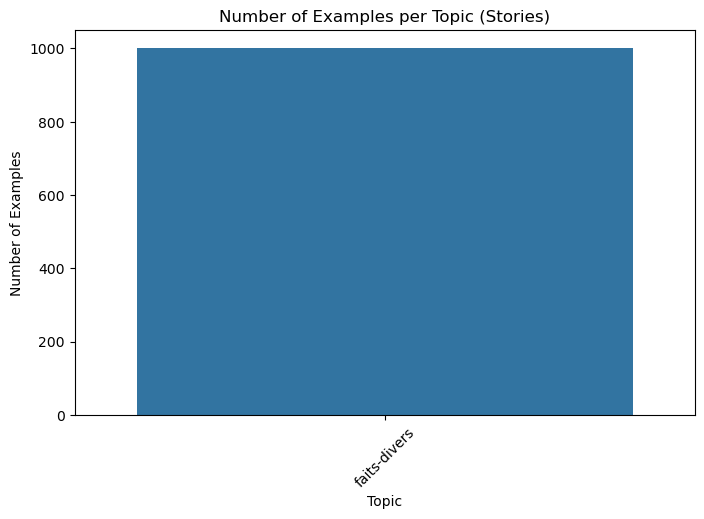

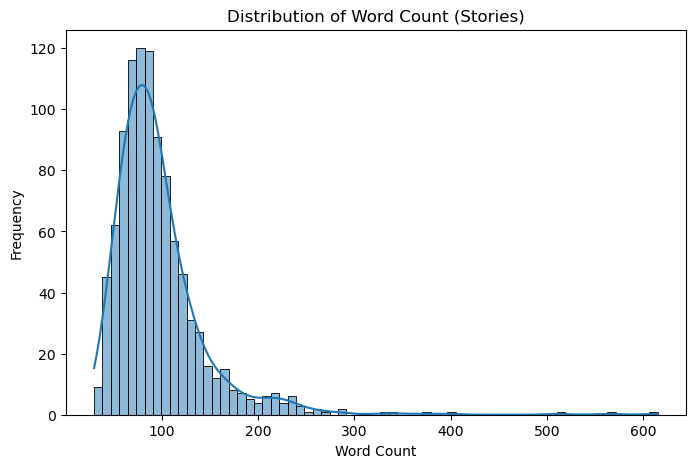

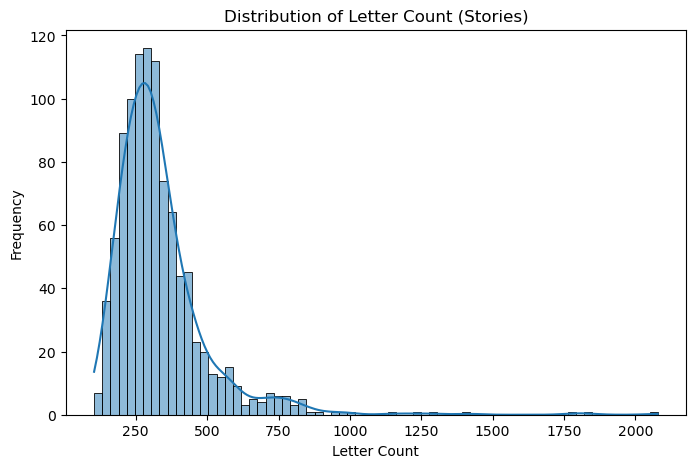


Author Analysis (Top 5 Authors - Stories):
هسبريس من الرباط            259
إبراهيم مغراوي من مراكش     104
رشيد بيجيكن من أكادير        81
إبراهيم الحافظون من سطات     57
رشيد الكويرتي من فاس         57
Name: author, dtype: int64
EDA for Stories DataFrame:

Top Frequent 2-grams for art-et-culture:
(' ', ' ') - Count: 36394
('ر', ' ') - Count: 33415
('ل', ' ') - Count: 25239
('ه', ' ') - Count: 22938
('ب', ' ') - Count: 20639
(' ', 'و') - Count: 19961
(' ', 'ع') - Count: 19353
('د', ' ') - Count: 19335
('م', ' ') - Count: 18695
(' ', 'ا') - Count: 15500
Number of Examples per Topic:
art-et-culture    1000
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
(' ', ' ') - Count: 36394
('ر', ' ') - Count: 33415
('ل', ' ') - Count: 25239
('ه', ' ') - Count: 22938
('ب', ' ') - Count: 20639
(' ', 'و') - Count: 19961
(' ', 'ع') - Count: 19353
('د', ' ') - Count: 19335
('م', ' ') - Count: 18695
(' ', 'ا') - Count: 15500


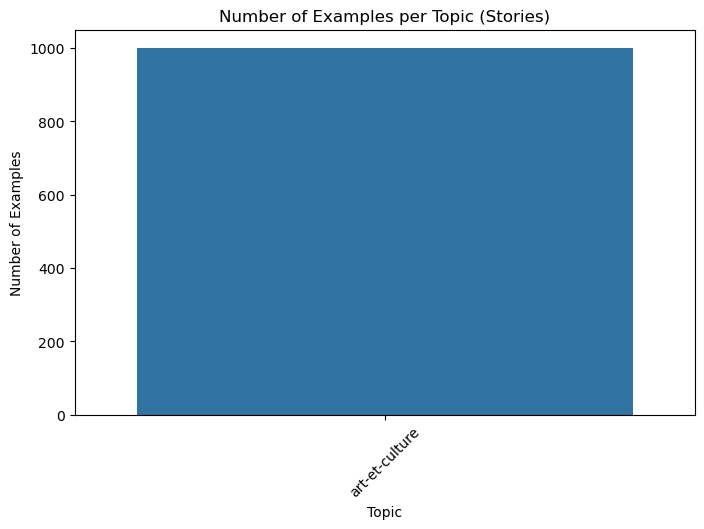

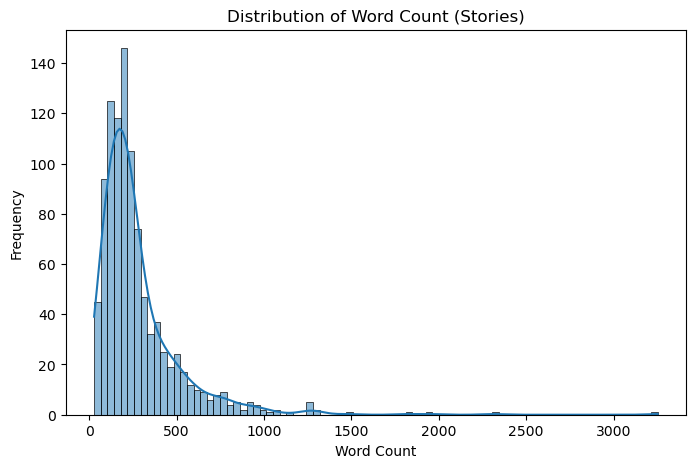

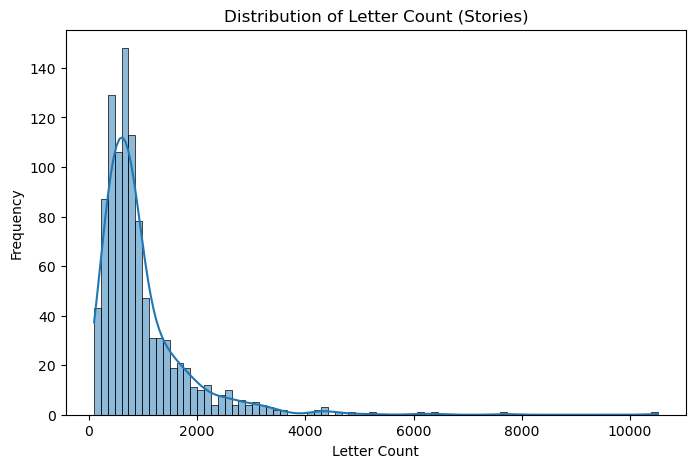


Author Analysis (Top 5 Authors - Stories):
هسبريس من الرباط         433
هسبريس - وائل بورشاشن    108
محمد بنعزيز               37
أيوب صدور من تطوان        21
هسبريس - محمد الراجي      21
Name: author, dtype: int64
EDA for Stories DataFrame:

Top Frequent 2-grams for regions:
('ه', ' ') - Count: 18697
('ر', ' ') - Count: 15955
('ل', ' ') - Count: 15786
(' ', ' ') - Count: 14144
(' ', 'و') - Count: 13709
(' ', 'ح') - Count: 10880
('د', ' ') - Count: 10001
('م', ' ') - Count: 9114
(' ', 'ج') - Count: 8853
('ي', ' ') - Count: 8744
Number of Examples per Topic:
regions    1000
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ه', ' ') - Count: 18697
('ر', ' ') - Count: 15955
('ل', ' ') - Count: 15786
(' ', ' ') - Count: 14144
(' ', 'و') - Count: 13709
(' ', 'ح') - Count: 10880
('د', ' ') - Count: 10001
('م', ' ') - Count: 9114
(' ', 'ج') - Count: 8853
('ي', ' ') - Count: 8744


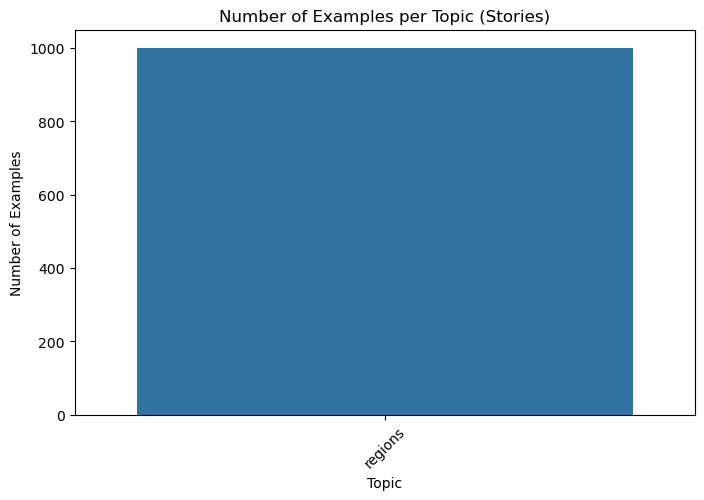

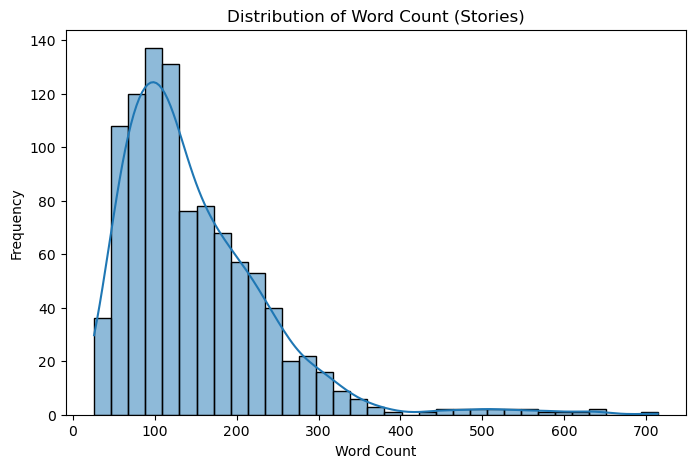

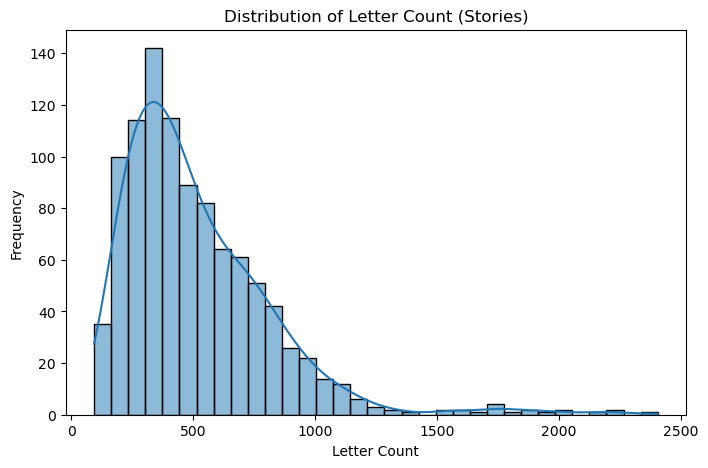


Author Analysis (Top 5 Authors - Stories):
هسبريس من الرباط               189
عبد الكريم هرواش من الناظور     72
إبراهيم مغراوي من مراكش         48
رشيد بيجيكن من أكادير           47
رشيد الكويرتي من فاس            41
Name: author, dtype: int64
EDA for Stories DataFrame:

Top Frequent 2-grams for sport:
('ر', ' ') - Count: 17670
(' ', ' ') - Count: 15233
('ب', ' ') - Count: 13690
('ل', ' ') - Count: 12788
('د', ' ') - Count: 12213
('م', ' ') - Count: 11281
('ي', ' ') - Count: 10442
(' ', 'و') - Count: 10419
(' ', 'ر') - Count: 10026
('ه', ' ') - Count: 9961
Number of Examples per Topic:
sport    1000
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ر', ' ') - Count: 17670
(' ', ' ') - Count: 15233
('ب', ' ') - Count: 13690
('ل', ' ') - Count: 12788
('د', ' ') - Count: 12213
('م', ' ') - Count: 11281
('ي', ' ') - Count: 10442
(' ', 'و') - Count: 10419
(' ', 'ر') - Count: 10026
('ه', ' ') - Count: 9961


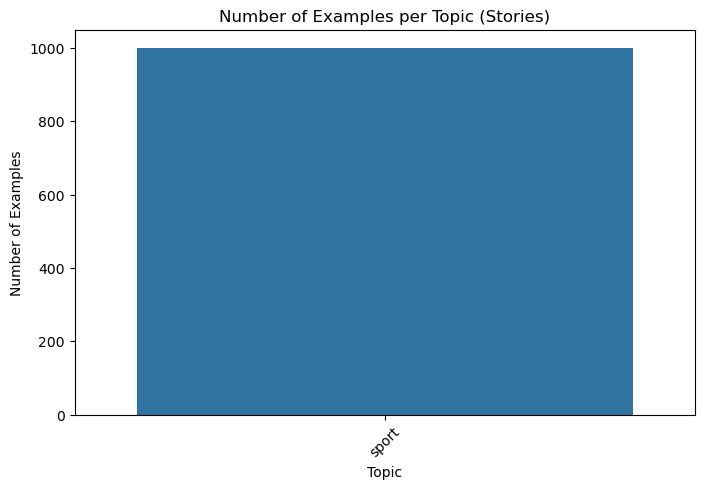

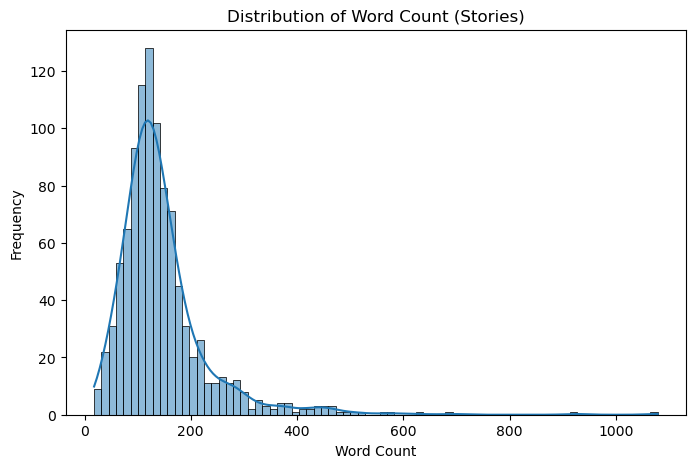

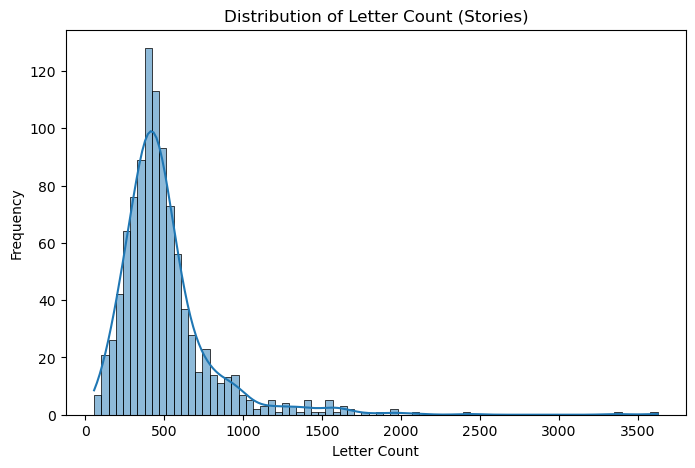


Author Analysis (Top 5 Authors - Stories):
أوعنا بلعيد             400
هسبورت - حمزة اشتيوي    126
هسبريس من الرباط         82
هسبريس ـ مُتابعة         71
هسبورت - آمال لكعيدا     66
Name: author, dtype: int64
EDA for Stories DataFrame:

Top Frequent 2-grams for medias:
('ر', ' ') - Count: 41469
(' ', ' ') - Count: 33715
('ه', ' ') - Count: 31856
('ل', ' ') - Count: 31530
(' ', 'و') - Count: 26396
('ب', ' ') - Count: 25212
('د', ' ') - Count: 23745
(' ', 'ع') - Count: 23602
('م', ' ') - Count: 23112
(' ', 'ح') - Count: 22234
Number of Examples per Topic:
medias    1000
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ر', ' ') - Count: 41469
(' ', ' ') - Count: 33715
('ه', ' ') - Count: 31856
('ل', ' ') - Count: 31530
(' ', 'و') - Count: 26396
('ب', ' ') - Count: 25212
('د', ' ') - Count: 23745
(' ', 'ع') - Count: 23602
('م', ' ') - Count: 23112
(' ', 'ح') - Count: 22234


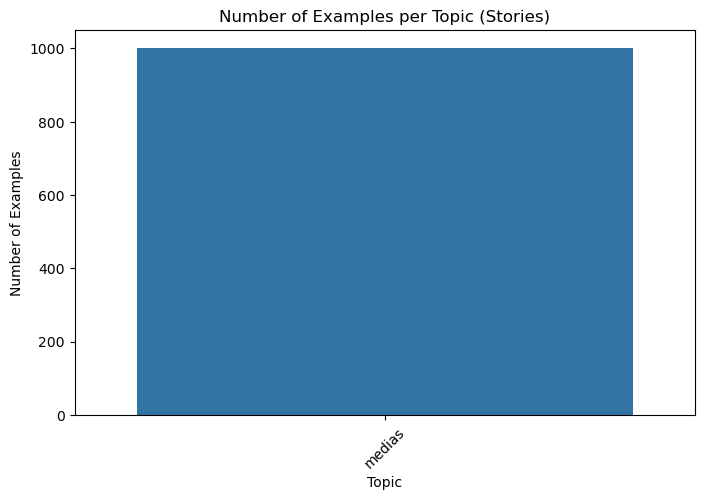

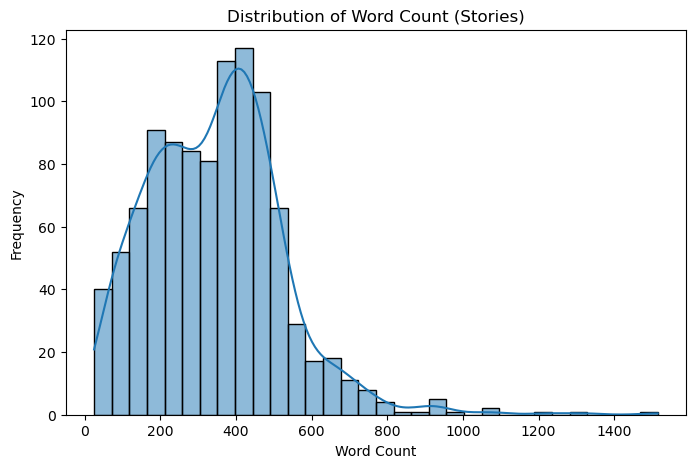

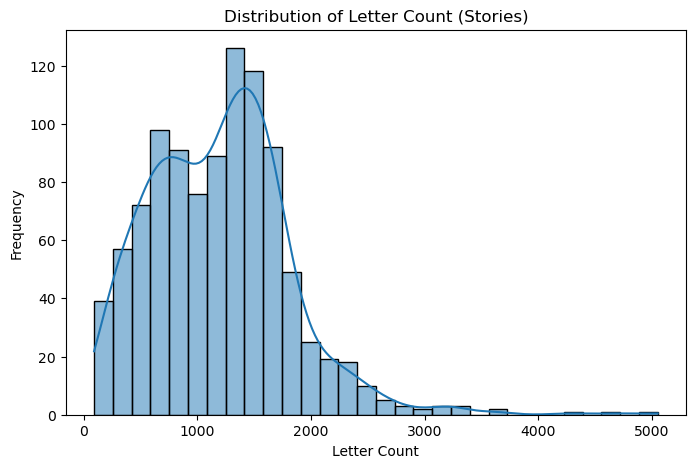


Author Analysis (Top 5 Authors - Stories):
هسبريس من الرباط               550
هسبريس ـ فاطمة الزهراء صدور    185
هسبريس - عبد الإله شبل          25
هسبريس من الدار البيضاء         18
هسبريس - وائل بورشاشن           16
Name: author, dtype: int64
EDA for Stories DataFrame:

Top Frequent 2-grams for economie:
('ر', ' ') - Count: 26726
(' ', ' ') - Count: 22529
('ل', ' ') - Count: 20535
('ه', ' ') - Count: 17578
(' ', 'و') - Count: 16728
('د', ' ') - Count: 15948
('م', ' ') - Count: 14704
('ب', ' ') - Count: 14158
(' ', 'ق') - Count: 13189
(' ', 'ع') - Count: 12777
Number of Examples per Topic:
economie    1000
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ر', ' ') - Count: 26726
(' ', ' ') - Count: 22529
('ل', ' ') - Count: 20535
('ه', ' ') - Count: 17578
(' ', 'و') - Count: 16728
('د', ' ') - Count: 15948
('م', ' ') - Count: 14704
('ب', ' ') - Count: 14158
(' ', 'ق') - Count: 13189
(' ', 'ع') - Count: 12777


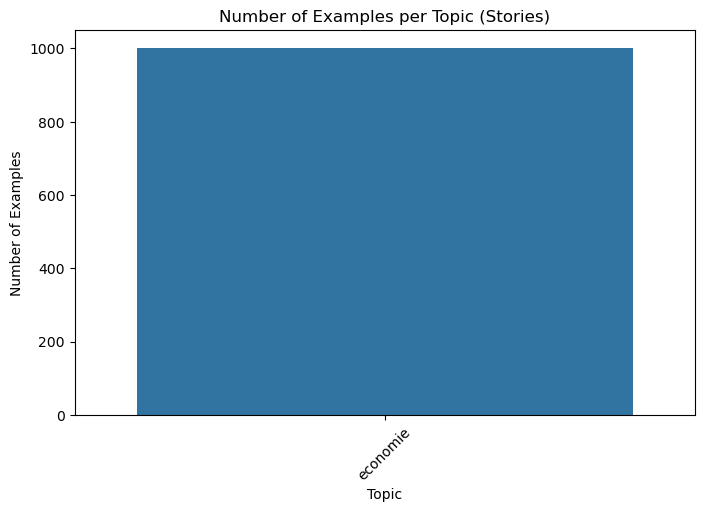

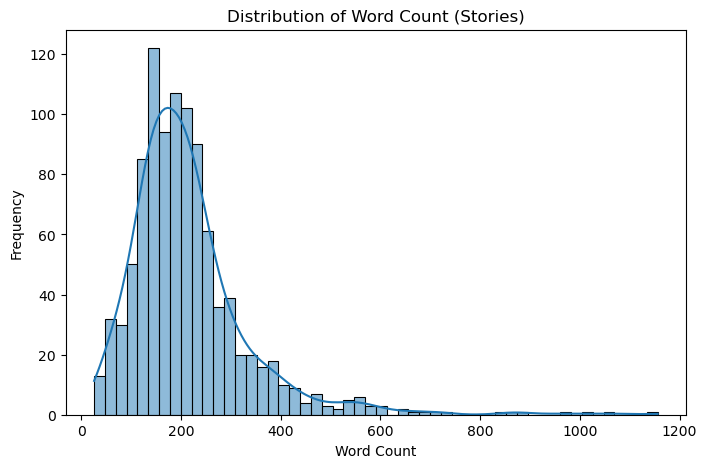

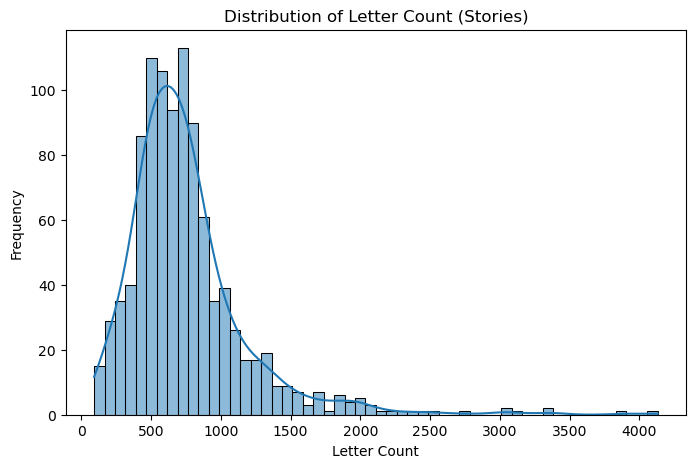


Author Analysis (Top 5 Authors - Stories):
هسبريس من الرباط           489
هسبريس - يوسف لخضر          68
هسبريس من الدار البيضاء     57
هسبريس – محمد لديب          47
هسبريس - محمد لديب          41
Name: author, dtype: int64
EDA for Stories DataFrame:

Top Frequent 2-grams for tamazight:
('ه', ' ') - Count: 34951
('ر', ' ') - Count: 32169
(' ', ' ') - Count: 31742
(' ', 'ا') - Count: 28670
('ل', ' ') - Count: 25840
(' ', 'ع') - Count: 21877
('م', ' ') - Count: 21613
(' ', 'و') - Count: 21405
('ب', ' ') - Count: 20726
('د', ' ') - Count: 19586
Number of Examples per Topic:
tamazight    1000
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ه', ' ') - Count: 34951
('ر', ' ') - Count: 32169
(' ', ' ') - Count: 31742
(' ', 'ا') - Count: 28670
('ل', ' ') - Count: 25840
(' ', 'ع') - Count: 21877
('م', ' ') - Count: 21613
(' ', 'و') - Count: 21405
('ب', ' ') - Count: 20726
('د', ' ') - Count: 19586


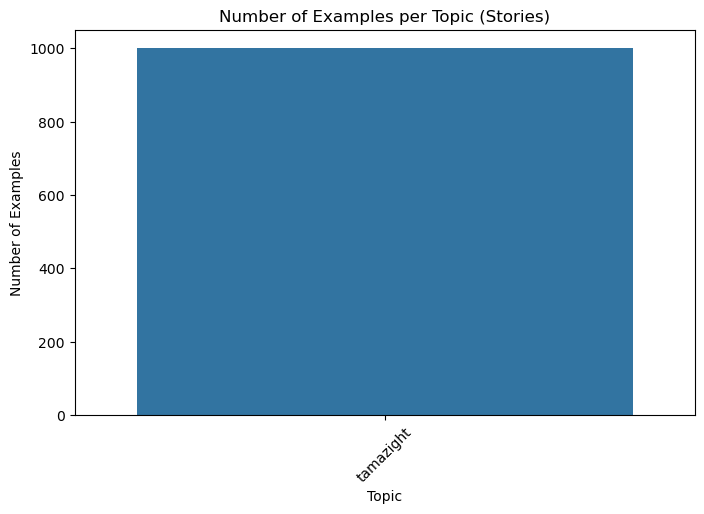

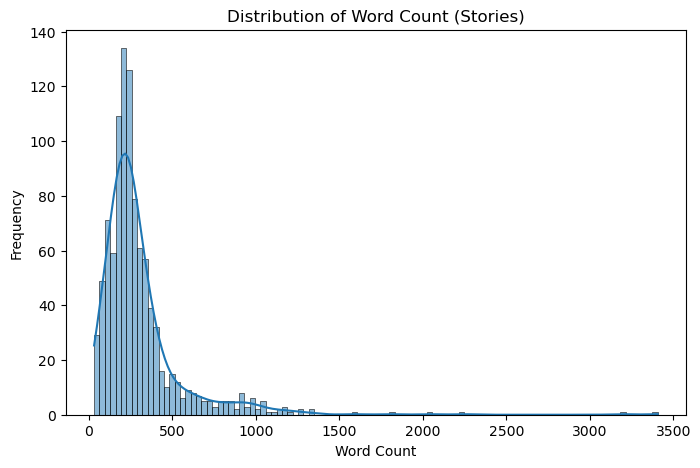

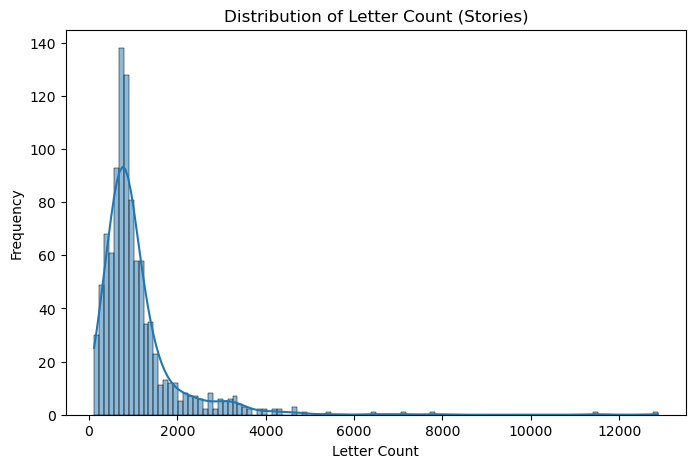


Author Analysis (Top 5 Authors - Stories):
هسبريس من الرباط        166
هسبريس - محمد الراجي    112
الطيب بوتبقالت*          29
هسبريس - و.م.ع           24
هسبريس - طارق بنهدا      20
Name: author, dtype: int64
EDA for Stories DataFrame:

Top Frequent 2-grams for societe:
('ر', ' ') - Count: 24018
(' ', ' ') - Count: 21615
('ه', ' ') - Count: 21088
('ل', ' ') - Count: 21029
(' ', 'و') - Count: 20936
('د', ' ') - Count: 14554
('م', ' ') - Count: 14254
('ب', ' ') - Count: 14048
(' ', 'ع') - Count: 13417
(' ', 'ح') - Count: 13305
Number of Examples per Topic:
societe    1000
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ر', ' ') - Count: 24018
(' ', ' ') - Count: 21615
('ه', ' ') - Count: 21088
('ل', ' ') - Count: 21029
(' ', 'و') - Count: 20936
('د', ' ') - Count: 14554
('م', ' ') - Count: 14254
('ب', ' ') - Count: 14048
(' ', 'ع') - Count: 13417
(' ', 'ح') - Count: 13305


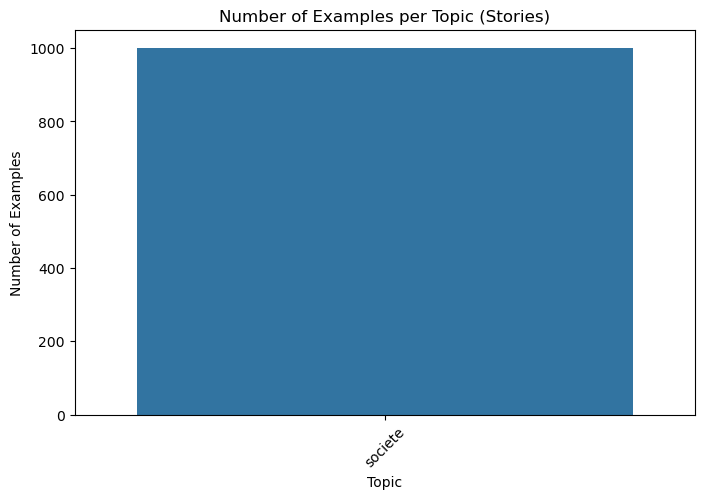

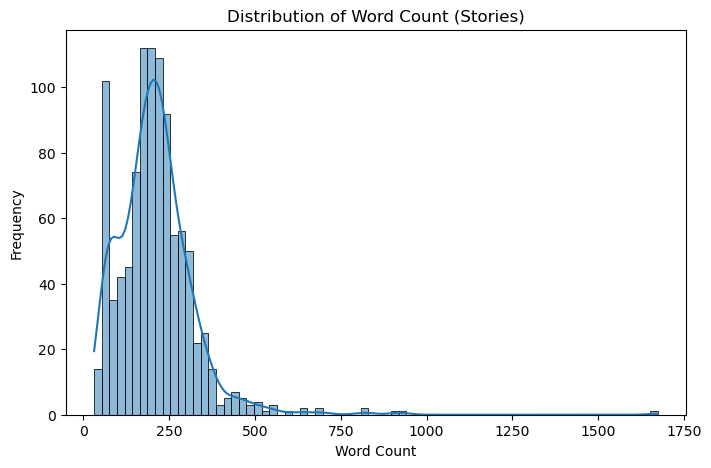

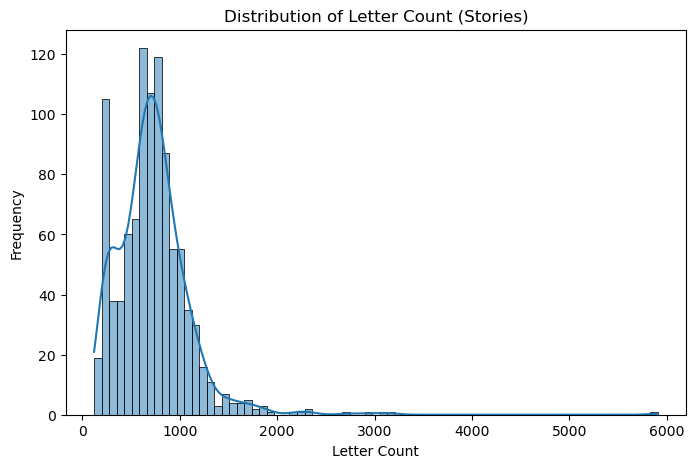


Author Analysis (Top 5 Authors - Stories):
هسبريس من الرباط              523
هسبريس - محمد الراجي           96
هسبريس - أمال كنين             81
هسبريس - عبد السلام الشامخ     32
هسبريس - مصطفى شاكري           25
Name: author, dtype: int64
EDA for Stories DataFrame:

Top Frequent 2-grams for orbites:
('ر', ' ') - Count: 47632
(' ', ' ') - Count: 41987
('ه', ' ') - Count: 36493
('ل', ' ') - Count: 35848
(' ', 'و') - Count: 31553
('د', ' ') - Count: 30657
('م', ' ') - Count: 28869
('ب', ' ') - Count: 28250
(' ', 'ع') - Count: 27909
(' ', 'ح') - Count: 24636
Number of Examples per Topic:
orbites    1000
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ر', ' ') - Count: 47632
(' ', ' ') - Count: 41987
('ه', ' ') - Count: 36493
('ل', ' ') - Count: 35848
(' ', 'و') - Count: 31553
('د', ' ') - Count: 30657
('م', ' ') - Count: 28869
('ب', ' ') - Count: 28250
(' ', 'ع') - Count: 27909
(' ', 'ح') - Count: 24636


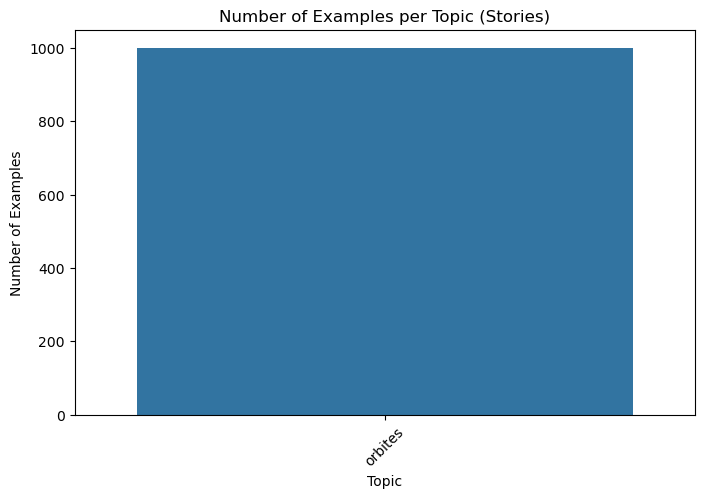

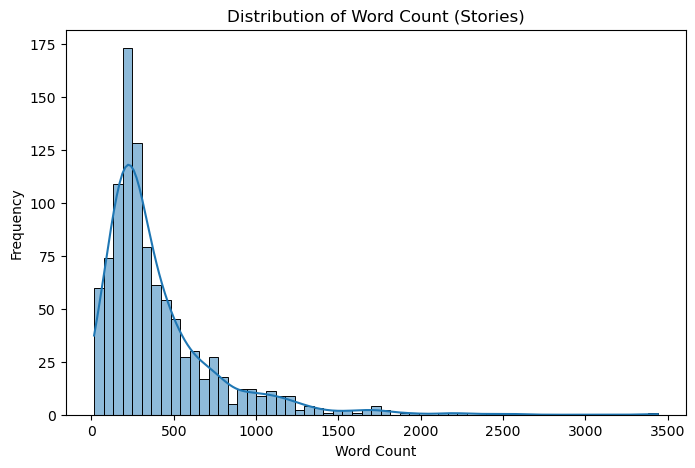

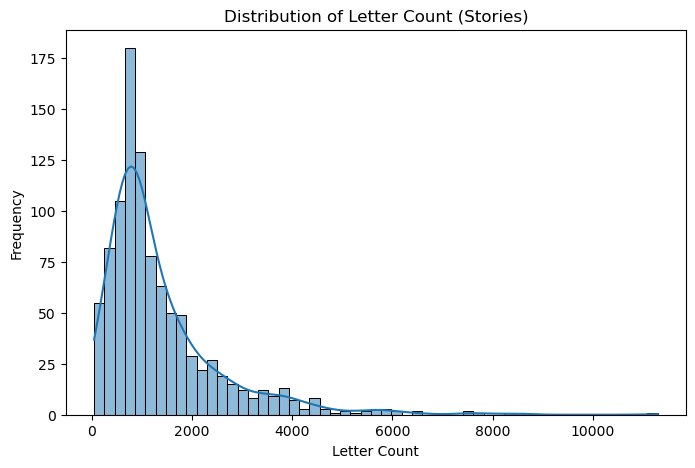


Author Analysis (Top 5 Authors - Stories):
هسبريس من الرباط              437
هسبريس - وائل بورشاشن          60
هسبريس - عبد السلام الشامخ     42
هسبريس - عبد الرحيم العسري     29
سعد سرحان                      28
Name: author, dtype: int64
EDA for Stories DataFrame:

Top Frequent 2-grams for politique:
('ر', ' ') - Count: 24926
(' ', ' ') - Count: 21999
('ب', ' ') - Count: 20626
('ه', ' ') - Count: 20063
('ل', ' ') - Count: 18873
(' ', 'و') - Count: 18063
(' ', 'ح') - Count: 16714
('د', ' ') - Count: 16614
('م', ' ') - Count: 16097
(' ', 'ع') - Count: 14438
Number of Examples per Topic:
politique    1000
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ر', ' ') - Count: 24926
(' ', ' ') - Count: 21999
('ب', ' ') - Count: 20626
('ه', ' ') - Count: 20063
('ل', ' ') - Count: 18873
(' ', 'و') - Count: 18063
(' ', 'ح') - Count: 16714
('د', ' ') - Count: 16614
('م', ' ') - Count: 16097
(' ', 'ع') - Count: 14438


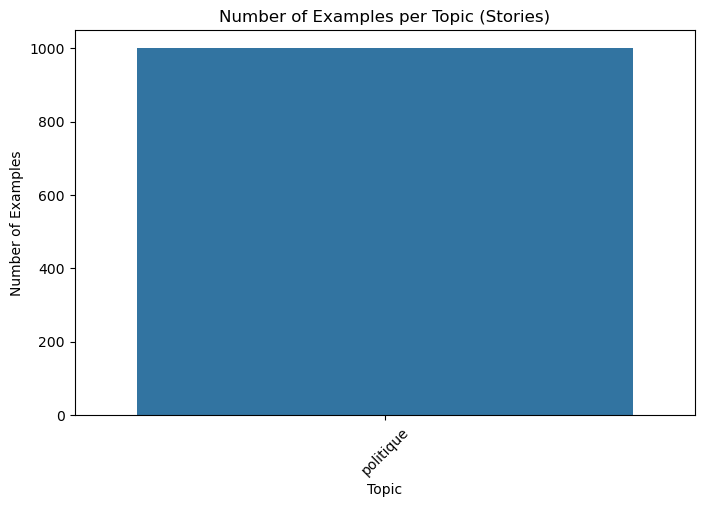

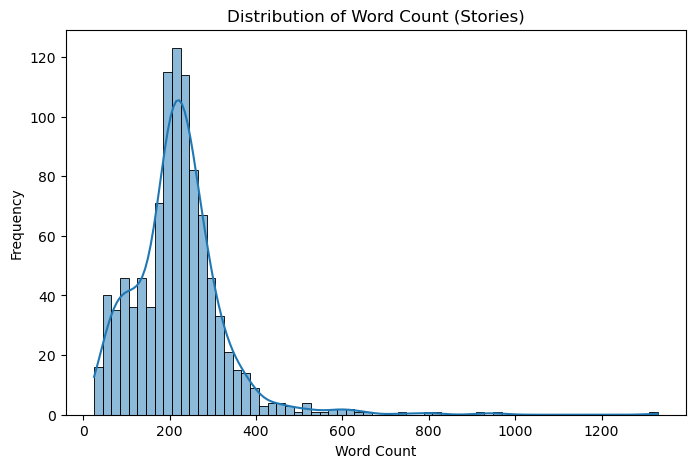

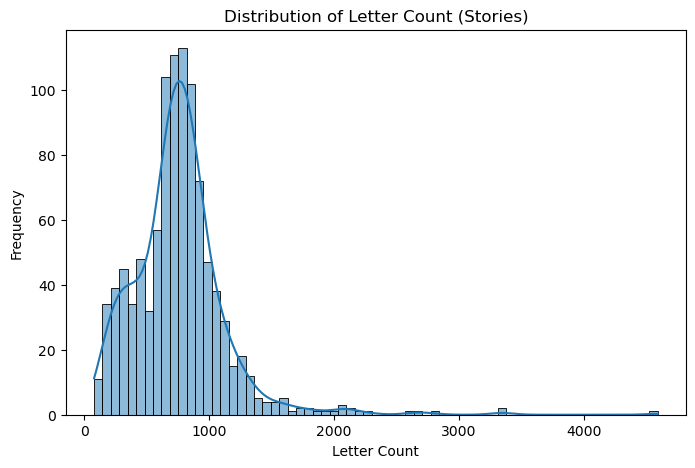


Author Analysis (Top 5 Authors - Stories):
هسبريس من الرباط              441
هسبريس - عبد الرحيم العسري     93
هسبريس - محمد بلقاسم           90
هسبريس - عبد السلام الشامخ     42
هسبريس - مصطفى شاكري           23
Name: author, dtype: int64
EDA for Stories DataFrame:

Top Frequent 2-grams for marocains-du-monde:
('ر', ' ') - Count: 28082
('ل', ' ') - Count: 23793
(' ', ' ') - Count: 23360
('ب', ' ') - Count: 22786
('ه', ' ') - Count: 19588
(' ', 'و') - Count: 19140
('د', ' ') - Count: 18525
('م', ' ') - Count: 16479
(' ', 'ع') - Count: 15801
(' ', 'ا') - Count: 13944
Number of Examples per Topic:
marocains-du-monde    1000
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ر', ' ') - Count: 28082
('ل', ' ') - Count: 23793
(' ', ' ') - Count: 23360
('ب', ' ') - Count: 22786
('ه', ' ') - Count: 19588
(' ', 'و') - Count: 19140
('د', ' ') - Count: 18525
('م', ' ') - Count: 16479
(' ', 'ع') - Count: 15801
(' ', 'ا') - Count: 13944


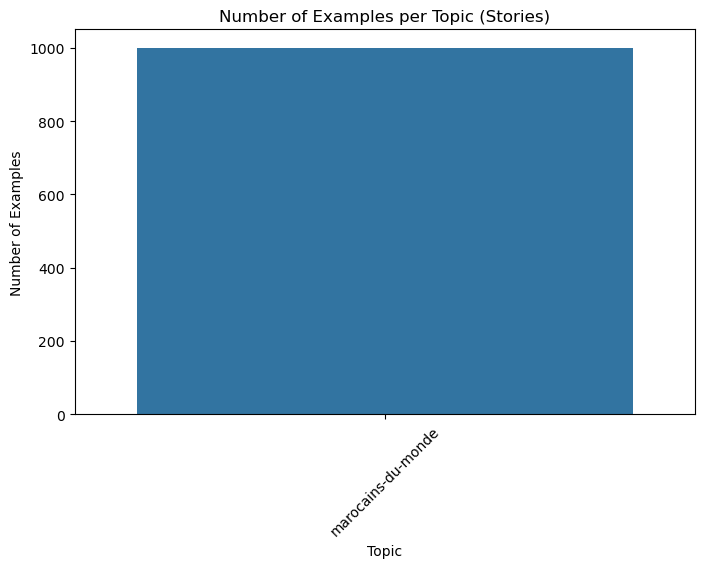

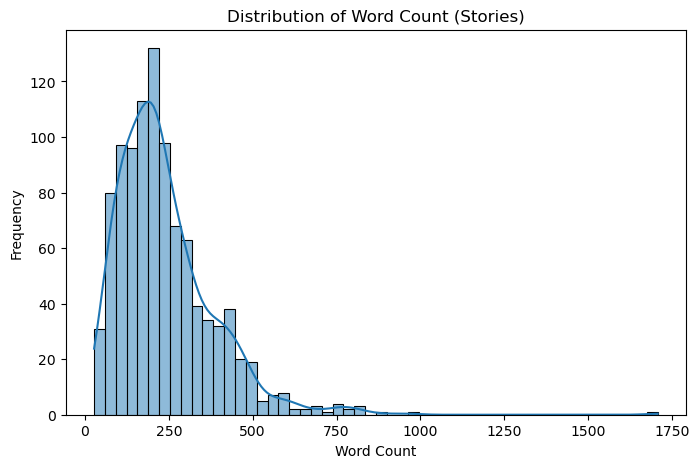

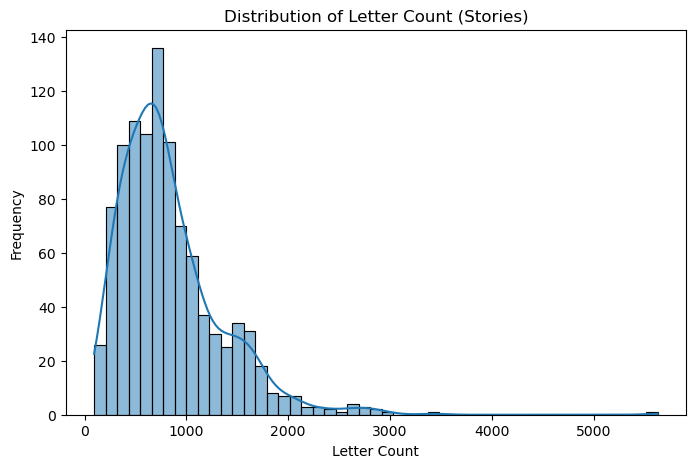


Author Analysis (Top 5 Authors - Stories):
هسبريس من الرباط                    372
هسبريس ـ ط. العاطفي | أ. الخياري     40
هسبريس - أمال كنين                   38
هسبريس ـ ط.العاطفي | أ.الخياري       38
متابعة من خالد ملوك                  31
Name: author, dtype: int64


In [5]:
def calculate_and_visualize_eda_stories(df, story_col='story', topic_col='topic', author_col='author'):
    # Check if the DataFrame contains required columns
    if story_col in df.columns and topic_col in df.columns:
        # Apply EDA specific to 'stories' DataFrame
        print("EDA for Stories DataFrame:")

        # Number of examples per topic
        examples_per_topic = df[topic_col].value_counts()

        # Top frequent n-grams
        n = 2  
        all_texts = ' '.join(df[story_col])
        all_ngrams = Counter(zip(*[all_texts[i:] for i in range(n)]))
        top_ngrams_overall = all_ngrams.most_common(10)

        class_ngrams = {}
        for topic_name, topic_group in df.groupby(topic_col):
            class_texts = ' '.join(topic_group[story_col])
            class_ngrams[topic_name] = Counter(zip(*[class_texts[i:] for i in range(n)]))
            class_top_ngrams = class_ngrams[topic_name].most_common(10)

            # Print the top 10 most common n-grams per topic
            print(f"\nTop Frequent {n}-grams for {topic_name}:")
            for ngram, count in class_top_ngrams:
                print(f"{ngram} - Count: {count}")

        # Lengths of examples in words and letters
        df['word_count'] = df[story_col].apply(lambda x: len(x.split()))
        df['letter_count'] = df[story_col].apply(lambda x: len(x.replace(' ', '')))

        # Insights and Visualizations
        print("Number of Examples per Topic:")
        print(examples_per_topic)

        print("\nTop Frequent {n}-grams Overall:")
        for ngram, count in top_ngrams_overall:
            print(f"{ngram} - Count: {count}")

        # Bar plot: Number of examples per topic
        plt.figure(figsize=(8, 5))
        sns.barplot(x=examples_per_topic.index, y=examples_per_topic.values)
        plt.xlabel('Topic')
        plt.ylabel('Number of Examples')
        plt.title('Number of Examples per Topic (Stories)')
        plt.xticks(rotation=45)
        plt.show()

        # Word count distribution
        plt.figure(figsize=(8, 5))
        sns.histplot(df['word_count'], kde=True)
        plt.xlabel('Word Count')
        plt.ylabel('Frequency')
        plt.title('Distribution of Word Count (Stories)')
        plt.show()

        # Letter count distribution
        plt.figure(figsize=(8, 5))
        sns.histplot(df['letter_count'], kde=True)
        plt.xlabel('Letter Count')
        plt.ylabel('Frequency')
        plt.title('Distribution of Letter Count (Stories)')
        plt.show()
        
        # Author Analysis (for stories dataset)
        top_authors_stories = df[author_col].value_counts().nlargest(5)
        print("\nAuthor Analysis (Top 5 Authors - Stories):")
        print(top_authors_stories)
        
for df in preprocessed_dfs:
    if 'story' in df.columns and 'topic' in df.columns:
        calculate_and_visualize_eda_stories(df)

EDA for Comments DataFrame:

Top Frequent 2-grams for marocains-du-monde:
(' ', ' ') - Count: 79666
('ب', ' ') - Count: 75888
('ر', ' ') - Count: 74699
('ل', ' ') - Count: 74590
('د', ' ') - Count: 58543
(' ', 'و') - Count: 53494
('م', ' ') - Count: 47122
(' ', 'ع') - Count: 43029
('ر', 'ب') - Count: 42452
(' ', 'ا') - Count: 41286
Number of Examples per Topic:
marocains-du-monde    27553
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
(' ', ' ') - Count: 79666
('ب', ' ') - Count: 75888
('ر', ' ') - Count: 74699
('ل', ' ') - Count: 74590
('د', ' ') - Count: 58543
(' ', 'و') - Count: 53494
('م', ' ') - Count: 47122
(' ', 'ع') - Count: 43029
('ر', 'ب') - Count: 42452
(' ', 'ا') - Count: 41286


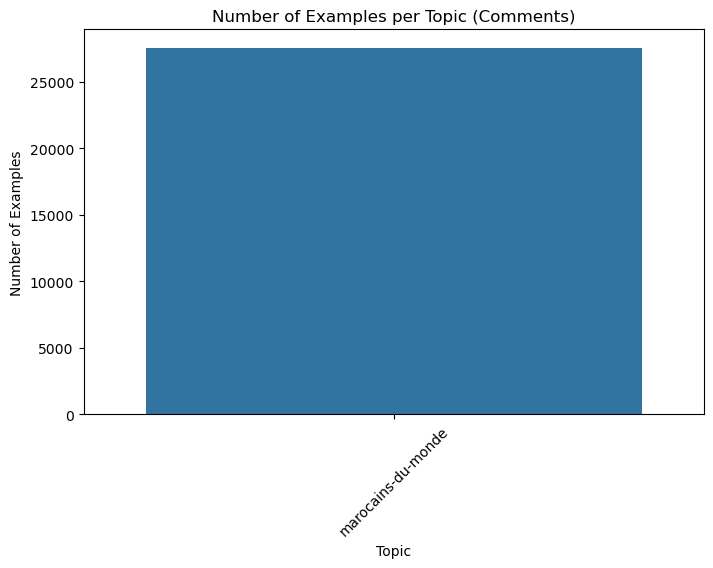

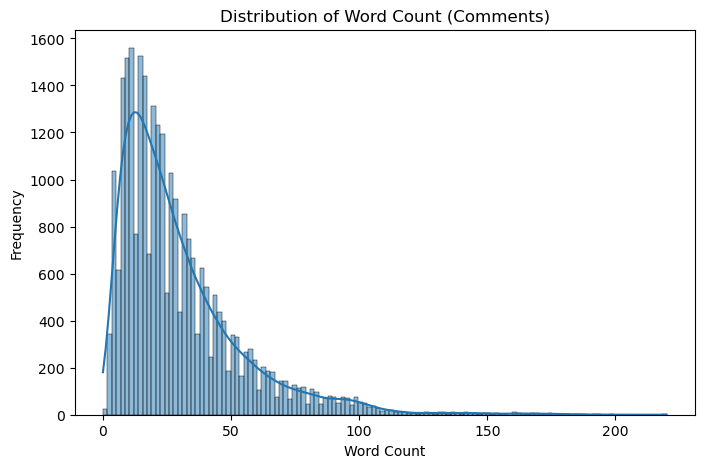

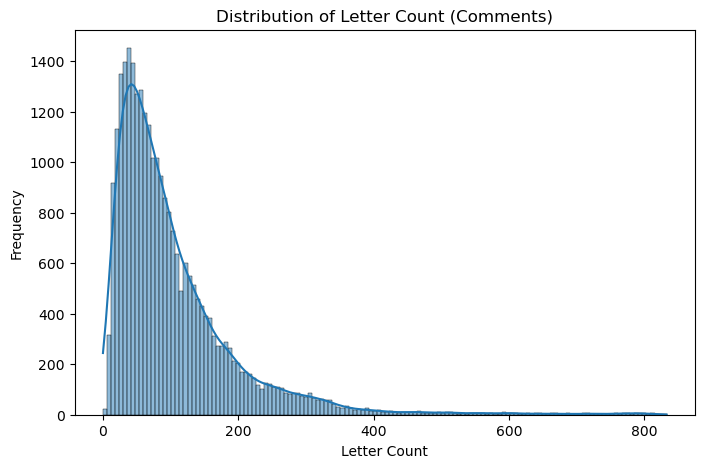


Sentiment Analysis (Positive and Negative Comments):
  Sentiment  Count
0  Positive  22605
1  Negative   4948
EDA for Comments DataFrame:

Top Frequent 2-grams for regions:
('ر', ' ') - Count: 26902
('ل', ' ') - Count: 26590
(' ', ' ') - Count: 24962
(' ', 'و') - Count: 18907
('ب', ' ') - Count: 18443
('د', ' ') - Count: 17266
('م', ' ') - Count: 16315
(' ', 'ح') - Count: 14456
(' ', 'ع') - Count: 14175
('ه', ' ') - Count: 13294
Number of Examples per Topic:
regions    9769
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ر', ' ') - Count: 26902
('ل', ' ') - Count: 26590
(' ', ' ') - Count: 24962
(' ', 'و') - Count: 18907
('ب', ' ') - Count: 18443
('د', ' ') - Count: 17266
('م', ' ') - Count: 16315
(' ', 'ح') - Count: 14456
(' ', 'ع') - Count: 14175
('ه', ' ') - Count: 13294


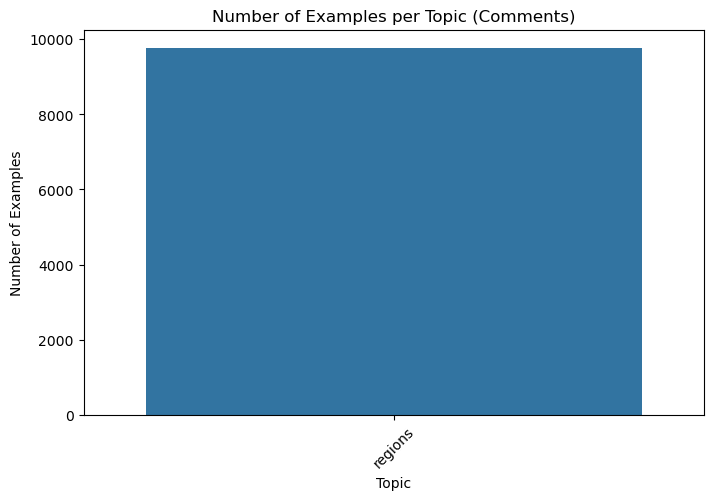

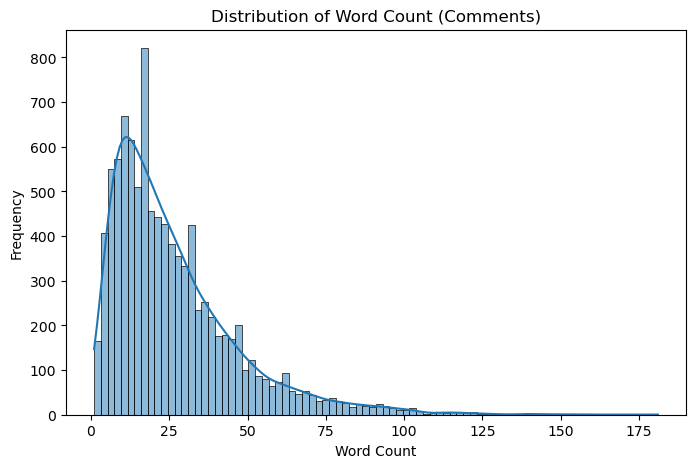

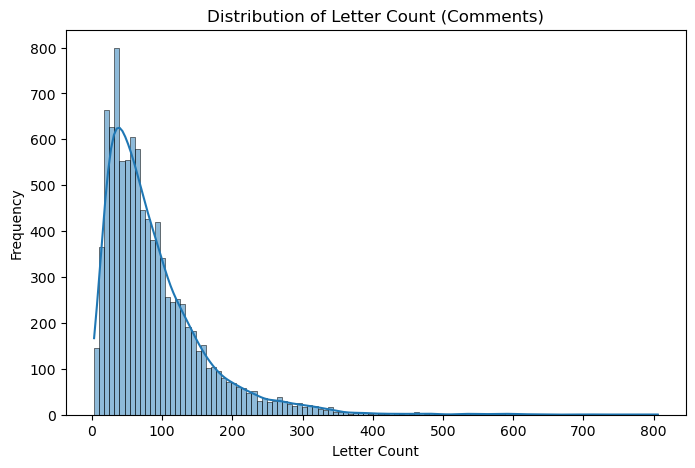


Sentiment Analysis (Positive and Negative Comments):
  Sentiment  Count
0  Positive   8413
1  Negative   1356
EDA for Comments DataFrame:

Top Frequent 2-grams for orbites:
('ر', ' ') - Count: 103263
(' ', ' ') - Count: 93999
('ب', ' ') - Count: 91566
('ل', ' ') - Count: 85118
('د', ' ') - Count: 72089
('م', ' ') - Count: 65717
(' ', 'و') - Count: 61025
(' ', 'ع') - Count: 57839
(' ', 'ا') - Count: 53967
(' ', 'ح') - Count: 53590
Number of Examples per Topic:
orbites    32549
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ر', ' ') - Count: 103263
(' ', ' ') - Count: 93999
('ب', ' ') - Count: 91566
('ل', ' ') - Count: 85118
('د', ' ') - Count: 72089
('م', ' ') - Count: 65717
(' ', 'و') - Count: 61025
(' ', 'ع') - Count: 57839
(' ', 'ا') - Count: 53967
(' ', 'ح') - Count: 53590


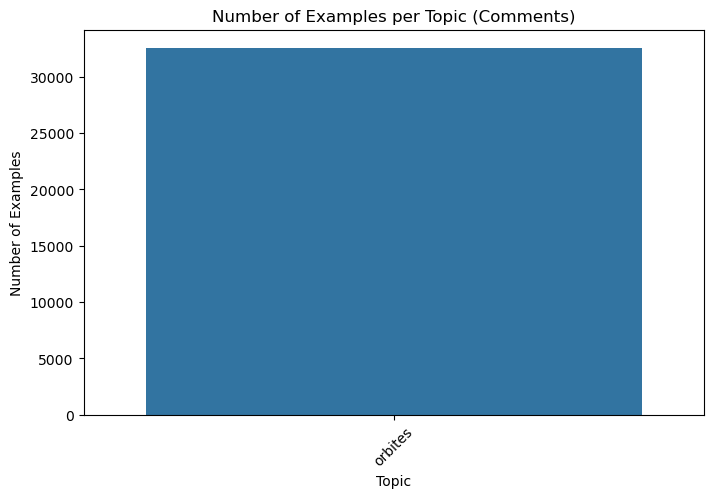

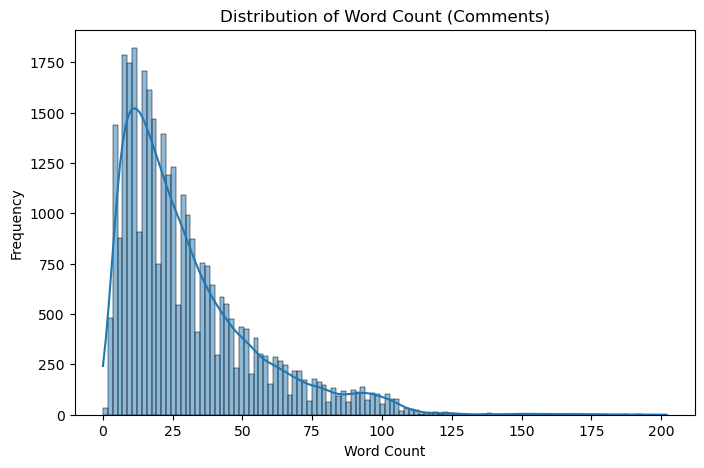

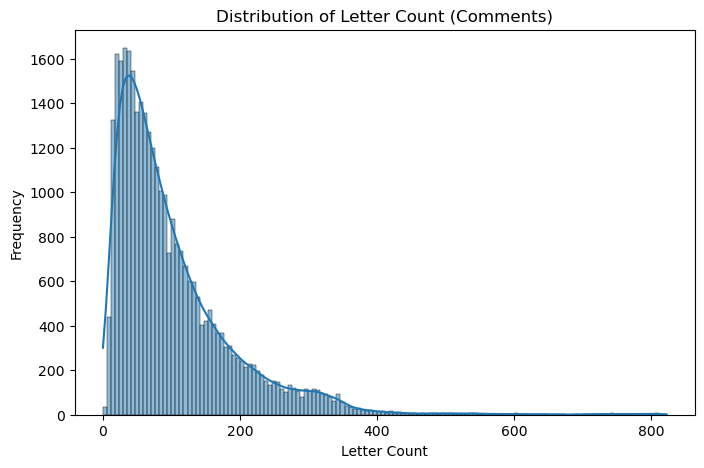


Sentiment Analysis (Positive and Negative Comments):
  Sentiment  Count
0  Positive  25343
1  Negative   7206
EDA for Comments DataFrame:

Top Frequent 2-grams for art-et-culture:
(' ', ' ') - Count: 26452
('ر', ' ') - Count: 24801
('ل', ' ') - Count: 23403
('ب', ' ') - Count: 20549
('م', ' ') - Count: 18433
('د', ' ') - Count: 17910
(' ', 'و') - Count: 16936
(' ', 'ع') - Count: 15848
('ه', ' ') - Count: 15773
(' ', 'ا') - Count: 14802
Number of Examples per Topic:
art-et-culture    10568
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
(' ', ' ') - Count: 26452
('ر', ' ') - Count: 24801
('ل', ' ') - Count: 23403
('ب', ' ') - Count: 20549
('م', ' ') - Count: 18433
('د', ' ') - Count: 17910
(' ', 'و') - Count: 16936
(' ', 'ع') - Count: 15848
('ه', ' ') - Count: 15773
(' ', 'ا') - Count: 14802


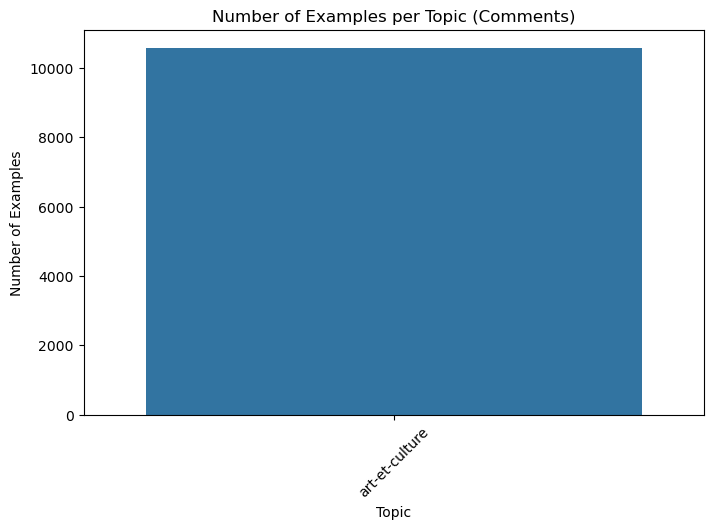

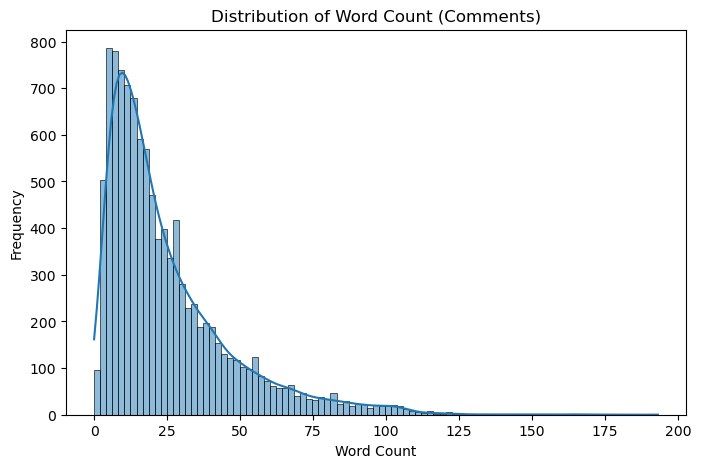

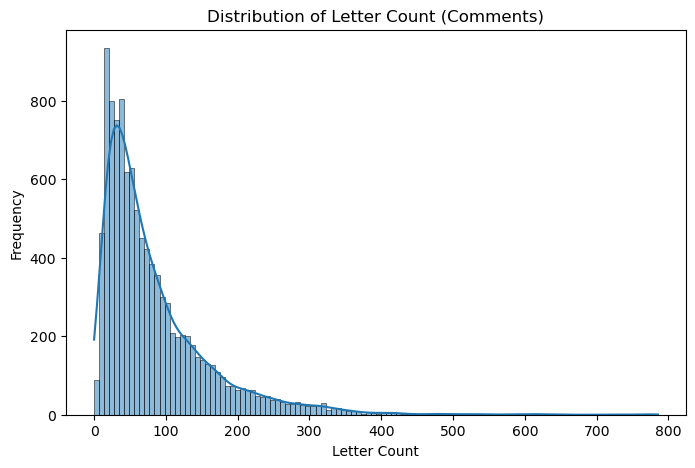


Sentiment Analysis (Positive and Negative Comments):
  Sentiment  Count
0  Positive   9013
1  Negative   1555
EDA for Comments DataFrame:

Top Frequent 2-grams for economie:
('ر', ' ') - Count: 77575
(' ', ' ') - Count: 77165
('ل', ' ') - Count: 72322
('ب', ' ') - Count: 60207
('د', ' ') - Count: 56037
(' ', 'و') - Count: 49991
('م', ' ') - Count: 45403
(' ', 'ع') - Count: 39097
(' ', 'ح') - Count: 36349
(' ', 'ا') - Count: 36074
Number of Examples per Topic:
economie    28076
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ر', ' ') - Count: 77575
(' ', ' ') - Count: 77165
('ل', ' ') - Count: 72322
('ب', ' ') - Count: 60207
('د', ' ') - Count: 56037
(' ', 'و') - Count: 49991
('م', ' ') - Count: 45403
(' ', 'ع') - Count: 39097
(' ', 'ح') - Count: 36349
(' ', 'ا') - Count: 36074


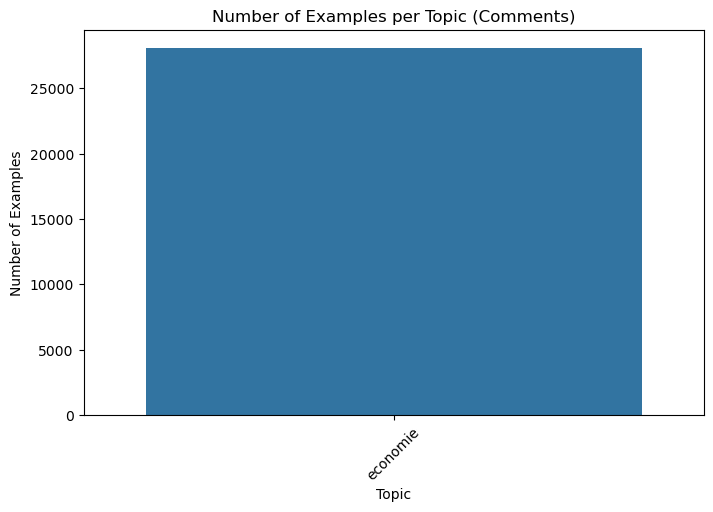

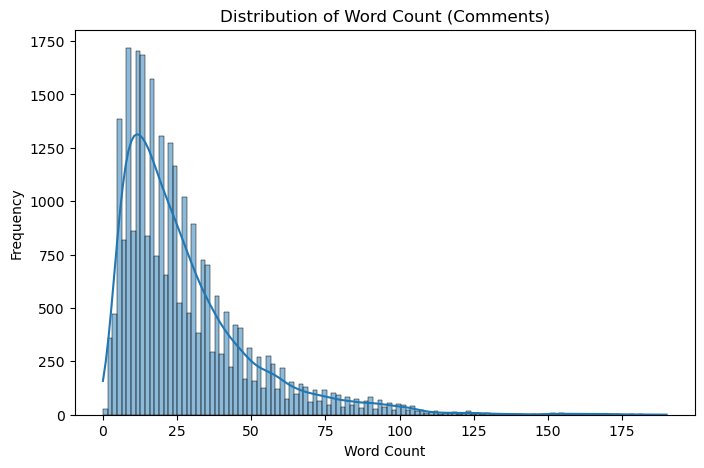

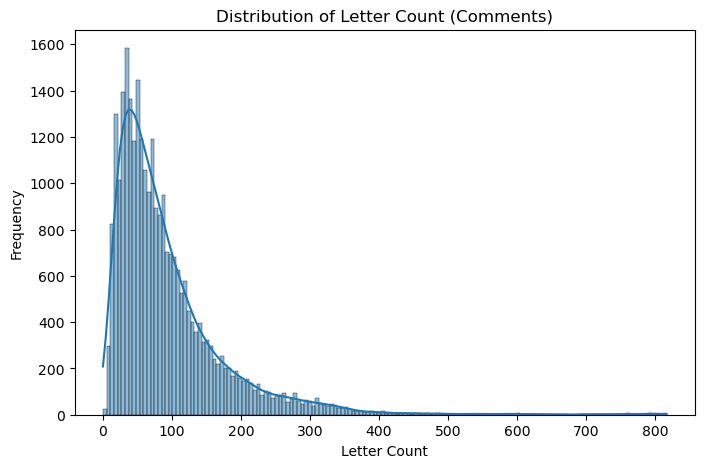


Sentiment Analysis (Positive and Negative Comments):
  Sentiment  Count
0  Positive  23775
1  Negative   4301
EDA for Comments DataFrame:

Top Frequent 2-grams for medias:
(' ', ' ') - Count: 82510
('ر', ' ') - Count: 79405
('ل', ' ') - Count: 74357
('ب', ' ') - Count: 68165
('د', ' ') - Count: 56535
('م', ' ') - Count: 52441
(' ', 'و') - Count: 52369
(' ', 'ع') - Count: 44163
(' ', 'ح') - Count: 44084
('ه', ' ') - Count: 43756
Number of Examples per Topic:
medias    30277
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
(' ', ' ') - Count: 82510
('ر', ' ') - Count: 79405
('ل', ' ') - Count: 74357
('ب', ' ') - Count: 68165
('د', ' ') - Count: 56535
('م', ' ') - Count: 52441
(' ', 'و') - Count: 52369
(' ', 'ع') - Count: 44163
(' ', 'ح') - Count: 44084
('ه', ' ') - Count: 43756


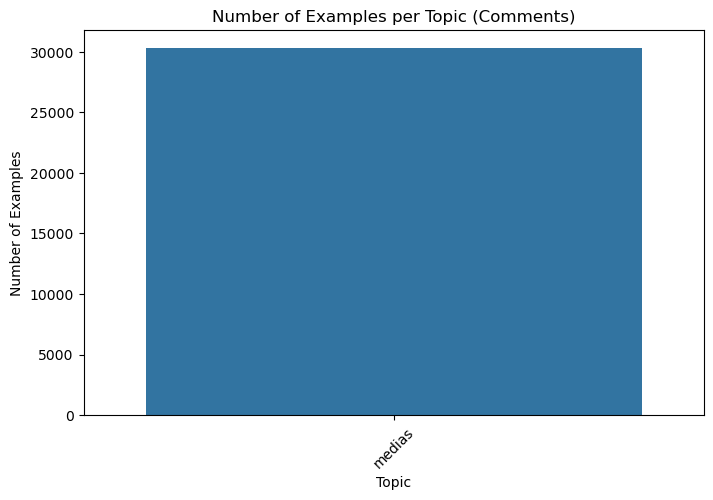

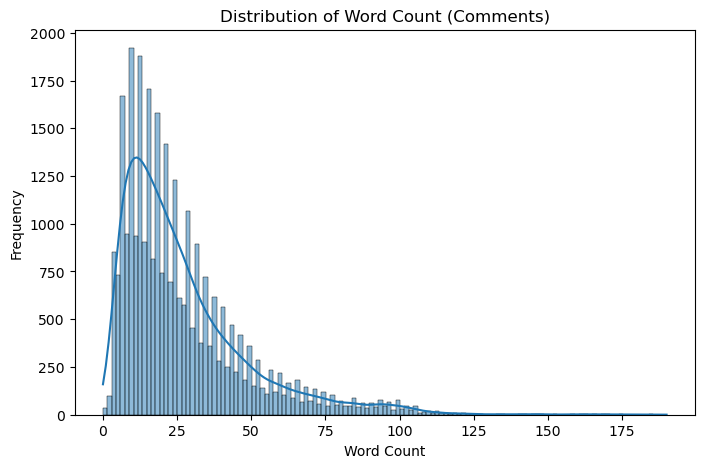

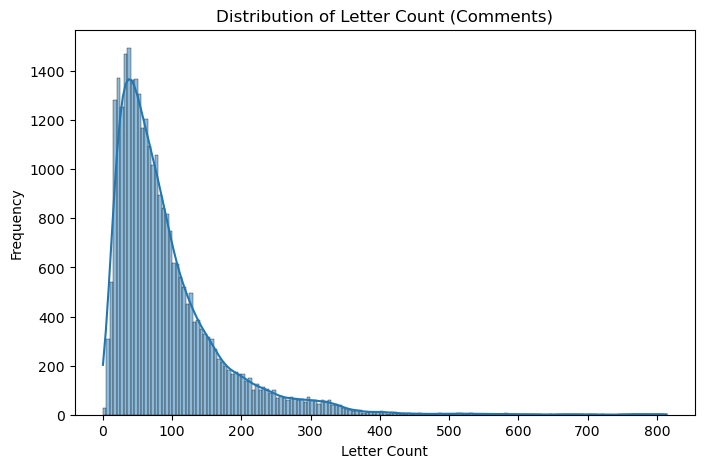


Sentiment Analysis (Positive and Negative Comments):
  Sentiment  Count
0  Positive  25331
1  Negative   4946
EDA for Comments DataFrame:

Top Frequent 2-grams for sport:
(' ', ' ') - Count: 20036
('ب', ' ') - Count: 19508
('ر', ' ') - Count: 18662
('ل', ' ') - Count: 17087
('د', ' ') - Count: 14128
(' ', 'و') - Count: 13055
('م', ' ') - Count: 11392
(' ', 'ر') - Count: 11035
(' ', 'ل') - Count: 10353
(' ', 'ب') - Count: 10298
Number of Examples per Topic:
sport    8110
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
(' ', ' ') - Count: 20036
('ب', ' ') - Count: 19508
('ر', ' ') - Count: 18662
('ل', ' ') - Count: 17087
('د', ' ') - Count: 14128
(' ', 'و') - Count: 13055
('م', ' ') - Count: 11392
(' ', 'ر') - Count: 11035
(' ', 'ل') - Count: 10353
(' ', 'ب') - Count: 10298


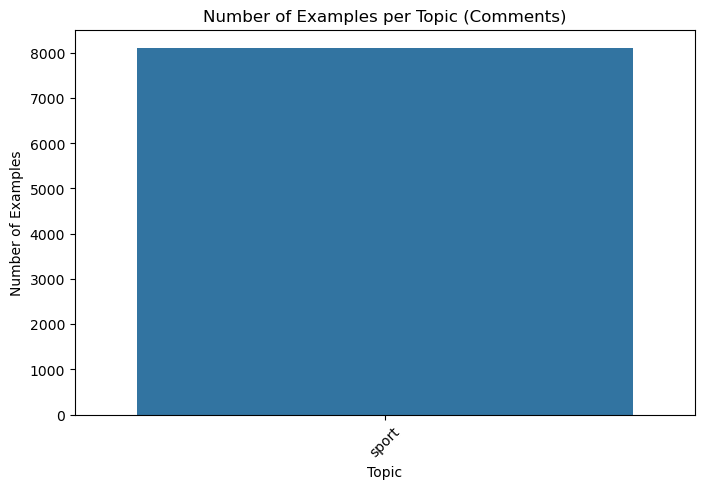

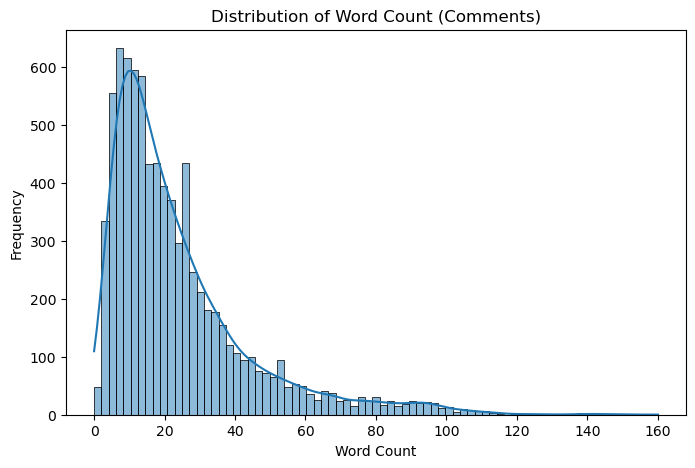

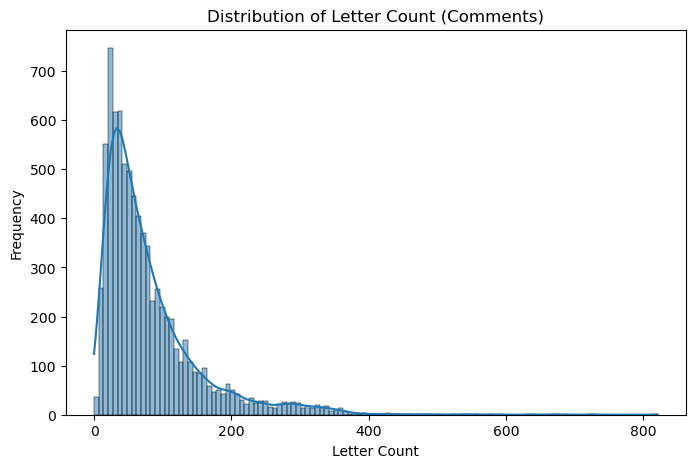


Sentiment Analysis (Positive and Negative Comments):
  Sentiment  Count
0  Positive   6288
1  Negative   1822
EDA for Comments DataFrame:

Top Frequent 2-grams for politique:
('ب', ' ') - Count: 132861
('ر', ' ') - Count: 127991
(' ', ' ') - Count: 117921
('ل', ' ') - Count: 113149
('د', ' ') - Count: 94923
('م', ' ') - Count: 86619
(' ', 'ح') - Count: 85780
(' ', 'و') - Count: 85736
(' ', 'ع') - Count: 68527
(' ', 'ا') - Count: 62970
Number of Examples per Topic:
politique    45857
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ب', ' ') - Count: 132861
('ر', ' ') - Count: 127991
(' ', ' ') - Count: 117921
('ل', ' ') - Count: 113149
('د', ' ') - Count: 94923
('م', ' ') - Count: 86619
(' ', 'ح') - Count: 85780
(' ', 'و') - Count: 85736
(' ', 'ع') - Count: 68527
(' ', 'ا') - Count: 62970


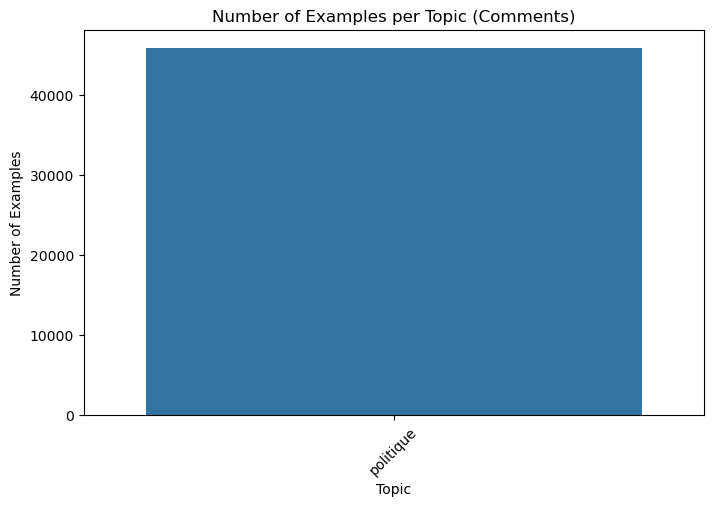

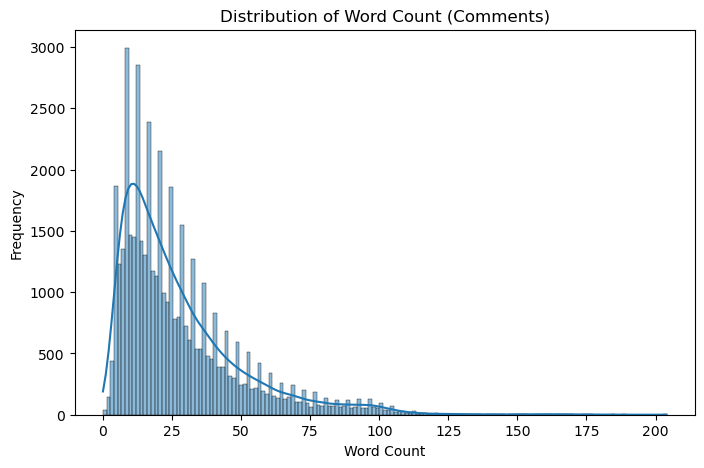

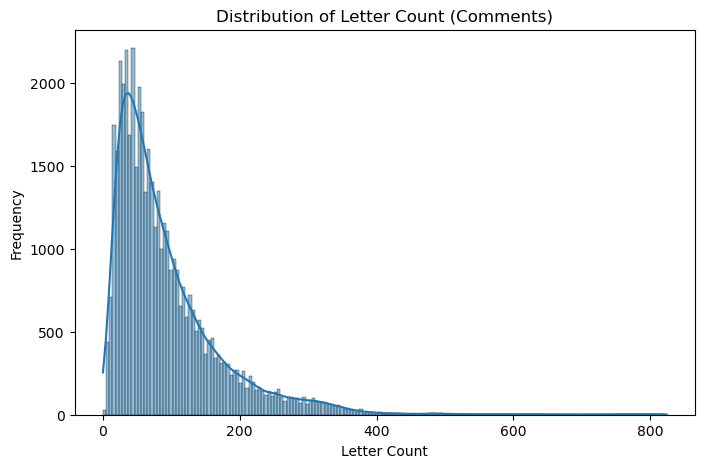


Sentiment Analysis (Positive and Negative Comments):
  Sentiment  Count
0  Positive  37137
1  Negative   8720
EDA for Comments DataFrame:

Top Frequent 2-grams for societe:
('ر', ' ') - Count: 129508
(' ', ' ') - Count: 128231
('ل', ' ') - Count: 128230
(' ', 'و') - Count: 95108
('ب', ' ') - Count: 93288
('م', ' ') - Count: 89250
('د', ' ') - Count: 88598
(' ', 'ع') - Count: 74583
(' ', 'ح') - Count: 72493
(' ', 'ا') - Count: 65522
Number of Examples per Topic:
societe    46555
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ر', ' ') - Count: 129508
(' ', ' ') - Count: 128231
('ل', ' ') - Count: 128230
(' ', 'و') - Count: 95108
('ب', ' ') - Count: 93288
('م', ' ') - Count: 89250
('د', ' ') - Count: 88598
(' ', 'ع') - Count: 74583
(' ', 'ح') - Count: 72493
(' ', 'ا') - Count: 65522


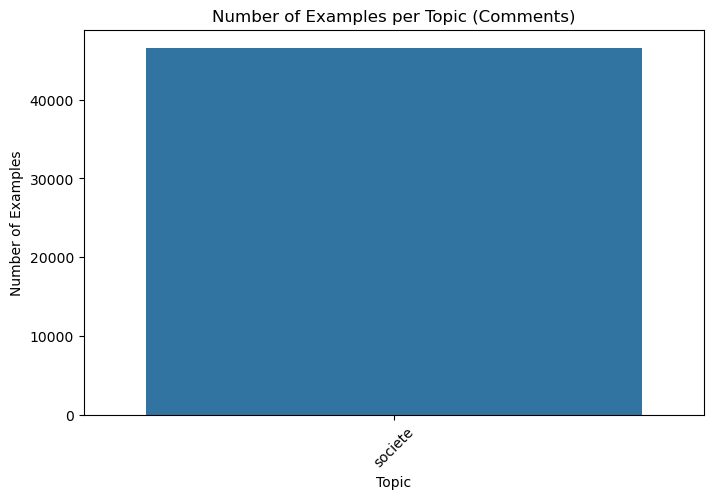

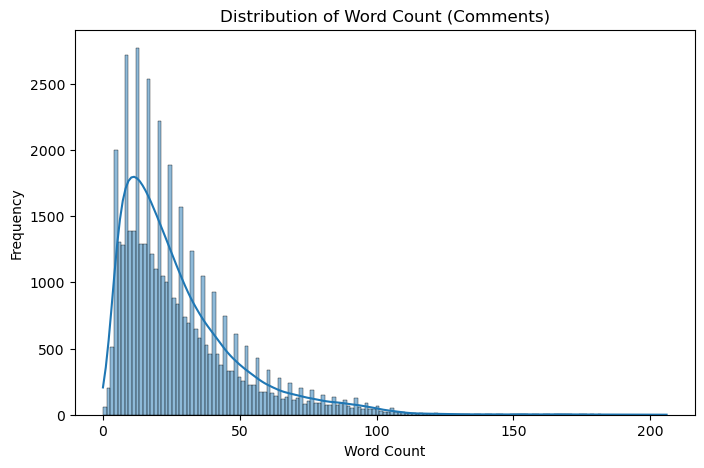

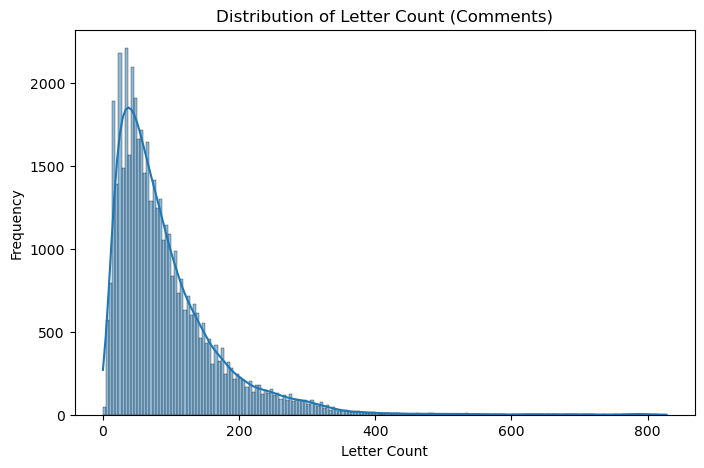


Sentiment Analysis (Positive and Negative Comments):
  Sentiment  Count
0  Positive  38709
1  Negative   7846
EDA for Comments DataFrame:

Top Frequent 2-grams for faits-divers:
('ل', ' ') - Count: 30164
(' ', ' ') - Count: 26805
('ر', ' ') - Count: 26697
('ب', ' ') - Count: 22039
('م', ' ') - Count: 22009
(' ', 'و') - Count: 19463
('د', ' ') - Count: 18356
(' ', 'ع') - Count: 17143
(' ', 'ح') - Count: 15712
('ه', ' ') - Count: 15170
Number of Examples per Topic:
faits-divers    12753
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
('ل', ' ') - Count: 30164
(' ', ' ') - Count: 26805
('ر', ' ') - Count: 26697
('ب', ' ') - Count: 22039
('م', ' ') - Count: 22009
(' ', 'و') - Count: 19463
('د', ' ') - Count: 18356
(' ', 'ع') - Count: 17143
(' ', 'ح') - Count: 15712
('ه', ' ') - Count: 15170


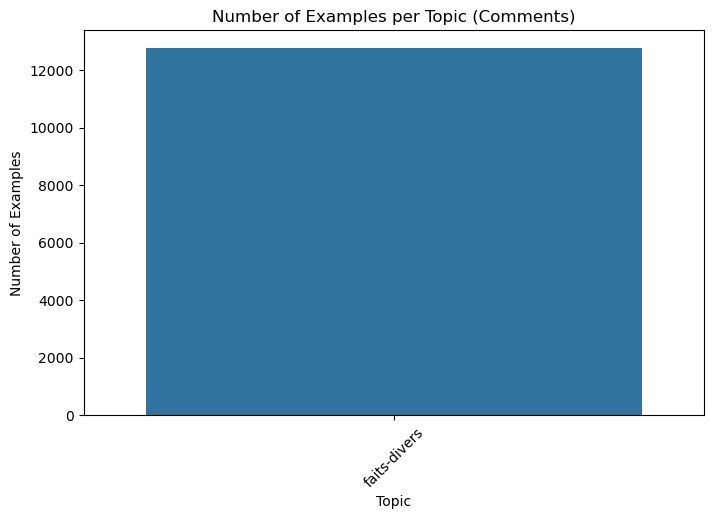

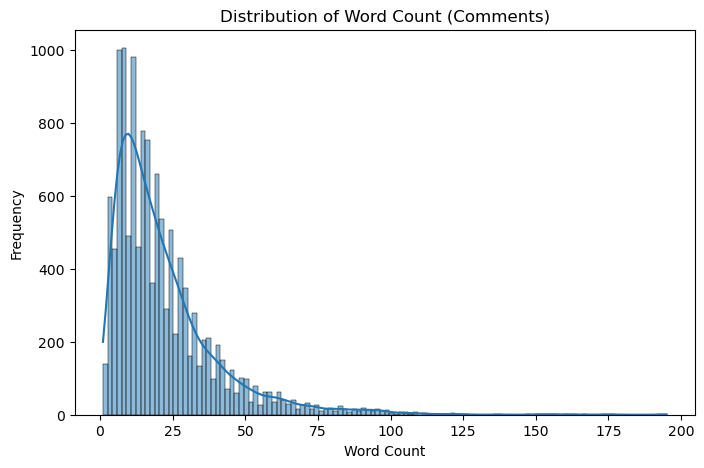

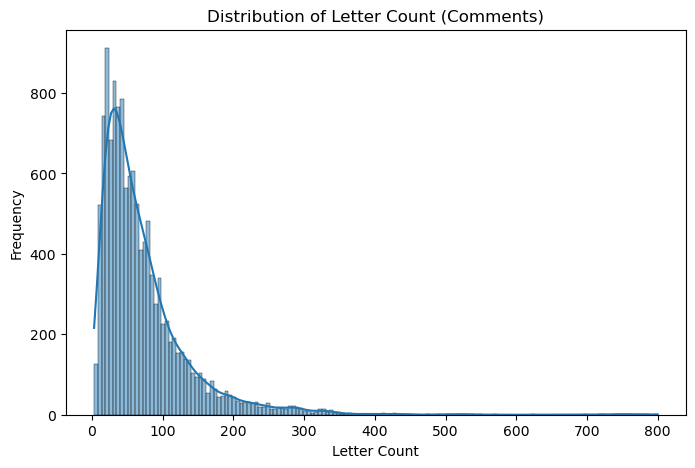


Sentiment Analysis (Positive and Negative Comments):
  Sentiment  Count
0  Positive  11387
1  Negative   1366
EDA for Comments DataFrame:

Top Frequent 2-grams for tamazight:
(' ', ' ') - Count: 250240
('ب', ' ') - Count: 219548
(' ', 'ا') - Count: 206415
('ر', ' ') - Count: 179774
(' ', 'ع') - Count: 176345
('ل', ' ') - Count: 175787
('ه', ' ') - Count: 156742
('د', ' ') - Count: 147218
('م', ' ') - Count: 140501
('ر', 'ب') - Count: 138025
Number of Examples per Topic:
tamazight    59448
Name: topic, dtype: int64

Top Frequent {n}-grams Overall:
(' ', ' ') - Count: 250240
('ب', ' ') - Count: 219548
(' ', 'ا') - Count: 206415
('ر', ' ') - Count: 179774
(' ', 'ع') - Count: 176345
('ل', ' ') - Count: 175787
('ه', ' ') - Count: 156742
('د', ' ') - Count: 147218
('م', ' ') - Count: 140501
('ر', 'ب') - Count: 138025


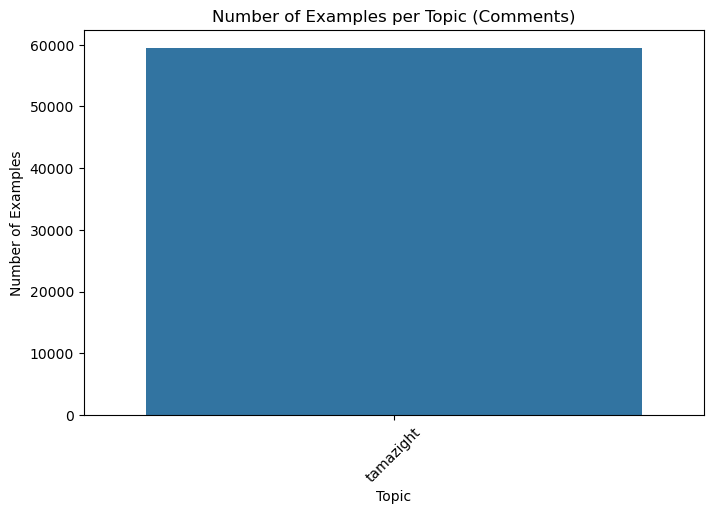

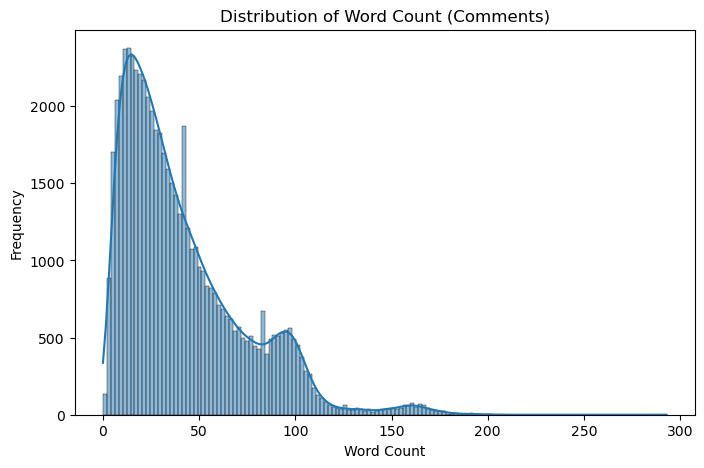

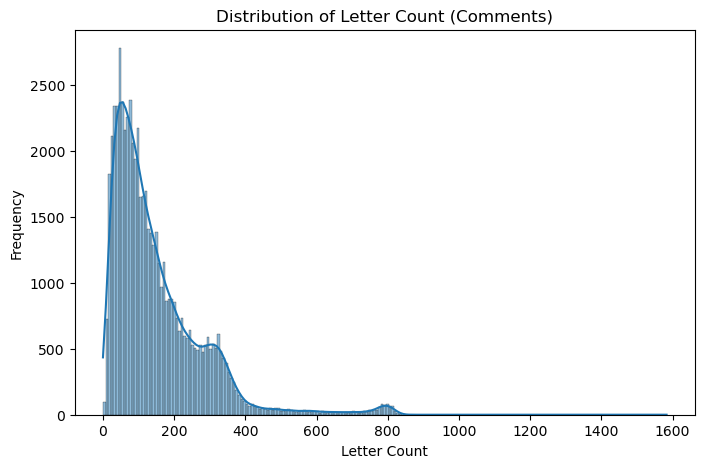


Sentiment Analysis (Positive and Negative Comments):
  Sentiment  Count
0  Positive  35923
1  Negative  23525


In [12]:
def calculate_and_visualize_eda_comments(df, comment_col='comment', topic_col='topic', score_col='score'):
    # Check if the DataFrame contains required columns
    if comment_col in df.columns and topic_col in df.columns:
        # Apply EDA specific to 'comments' DataFrame
        print("EDA for Comments DataFrame:")

        # Number of examples per topic
        examples_per_topic_comments = df[topic_col].value_counts()

        # Top frequent n-grams
        n = 2  
        all_texts = ' '.join(df[comment_col])
        all_ngrams = Counter(zip(*[all_texts[i:] for i in range(n)]))
        top_ngrams_overall = all_ngrams.most_common(10)

        class_ngrams = {}
        for topic_name, topic_group in df.groupby(topic_col):
            class_texts = ' '.join(topic_group[comment_col])
            class_ngrams[topic_name] = Counter(zip(*[class_texts[i:] for i in range(n)]))
            class_top_ngrams = class_ngrams[topic_name].most_common(10)

            # Print the top 10 most common n-grams per topic
            print(f"\nTop Frequent {n}-grams for {topic_name}:")
            for ngram, count in class_top_ngrams:
                print(f"{ngram} - Count: {count}")

        # Lengths of examples in words and letters
        df['word_count'] = df[comment_col].apply(lambda x: len(x.split()))
        df['letter_count'] = df[comment_col].apply(lambda x: len(x.replace(' ', '')))

        # Insights and Visualizations
        print("Number of Examples per Topic:")
        print(examples_per_topic_comments)

        print("\nTop Frequent {n}-grams Overall:")
        for ngram, count in top_ngrams_overall:
            print(f"{ngram} - Count: {count}")

        # Bar plot: Number of examples per topic
        plt.figure(figsize=(8, 5))
        sns.barplot(x=examples_per_topic_comments.index, y=examples_per_topic_comments.values)
        plt.xlabel('Topic')
        plt.ylabel('Number of Examples')
        plt.title('Number of Examples per Topic (Comments)')
        plt.xticks(rotation=45)
        plt.show()

        # Word count distribution
        plt.figure(figsize=(8, 5))
        sns.histplot(df['word_count'], kde=True)
        plt.xlabel('Word Count')
        plt.ylabel('Frequency')
        plt.title('Distribution of Word Count (Comments)')
        plt.show()

        # Letter count distribution
        plt.figure(figsize=(8, 5))
        sns.histplot(df['letter_count'], kde=True)
        plt.xlabel('Letter Count')
        plt.ylabel('Frequency')
        plt.title('Distribution of Letter Count (Comments)')
        plt.show()
        
        # Sentiment Analysis (for comments dataset)
        positive_comments = df[df['score'] >= 0]
        negative_comments = df[df['score'] < 0]
        sentiment_distribution_comments = pd.DataFrame({
            'Sentiment': ['Positive', 'Negative'],
            'Count': [len(positive_comments), len(negative_comments)]
        })
        print("\nSentiment Analysis (Positive and Negative Comments):")
        print(sentiment_distribution_comments)

# Loop through each DataFrame in preprocessed_dfs
for df in preprocessed_dfs:
    if 'comment' in df.columns and 'topic' in df.columns:
        calculate_and_visualize_eda_comments(df)
